In [1]:
import numpy as np
import sipm.sipm as sipm
import sipm.dataset as ds
import sipm.beta as beta
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sipm.constants as const
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Read SiPM pulse shape from csv

In [24]:
# import csv
# pulse_pars_top = []
# pulse_pars_bot = []
# with open('../pulse_parameters_65V.csv') as f:
#     r = csv.reader(f)
#     line_count = 0
#     for row in r:
#         if line_count>0:
#             if line_count<=4:
#                 pulse_pars_top.append([float(par) for par in row[1:]])
#                 print(pulse_pars_top[-1])
#             else:
#                 pulse_pars_bot.append([float(par) for par in row[1:]])
#                 print(pulse_pars_bot[-1])
#         line_count += 1

pulse_pars_top = [  [4.818108093289585,0.24333264827406823,4.347380101706774,0.017559628884591238],
                    [5.281324377314333,0.2787999021536439,5.024710203743045,0.00910062412542345],
                    [1.3238001370869361,0.5692250541045476,5.214761307910989,0.10124583455621992],
                    [1.8534035500351311,0.4275067892979614,4.829450377278491,0.06908005185618724]]
pulse_pars_bot = [  [3.0961502912281684,0.40403299656617736,4.031301888928057,0.0474947403947006],
                    [0.5703764778401712,1.139009653925973,5.741446984162888,0.08418902284102635],
                    [1.4484382154664293,0.7148347202664096,5.1493499838224,0.07648178637862194],
                    [0.7838514098331236,1.0140621739648736,5.759044453901097,0.11122538237449603]]


# List of Datasets
- Bottom:
    * 11/07: 1-6, overnight
    * 11/09: high stat
    * 11/10: high stat, overnight (~11/13)
    * 11/14: gamma, backgrounds
    
- Top:
    * 11/08: 0, overnight
    * 11/09: high stat
    * 11/10: high stat
    * 11/14: gamma, backgrounds

# 11/15 Top Bottom with Backgrounds

In [2]:
dir1115TopCs137 = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/'
dir1115TopBkg   = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_no_gamma_high_stat/'
dir1115TopCalib = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/'
dir1115BotCs137 = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/'
dir1115BotBkg   = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_high_stat/'
dir1115BotCalib = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/'
dir1115 = [dir1115TopCs137, dir1115TopBkg, dir1115TopCalib, dir1115BotCs137, dir1115BotBkg, dir1115BotCalib]

In [3]:
ds1115 = []
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[556.758,548.693,548.862,541.270], [556.997, 503.579, 549.769, 558.519]]
for i,dir in enumerate(dir1115):
    data = ds.Dataset('', pol=-1, channels=range(4), spe=gain[i//3])
    for j in range(5):
        if j!=13 or i!=3:
            for ch in range(4):
                subdir = '{}{}/'.format(dir, j)
                print(subdir)
                data.ch[ch].path = subdir
                data.ch[ch].read_data()
                print('nevents={}'.format(data.ch[ch].nevents))
                data.ch[ch].baseline_subtraction()
                data.ch[ch].get_integral(prompt=0.5, long=5)
                data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    data.get_avgwf_all(count=-1, integral_range=(50,800), fprompt_range=(0.2,0.35))
    ds1115.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/0/
nevents=5006
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/0/
nevents=5006
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/0/
nevents=5006
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/0/
nevents=5006
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/1/
nevents=4996
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/1/
nevents=4996
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/20

nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/2/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coinc_laser_cond_calibration/4/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_laser_coi

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_laser_coinc_laser_cond_calibration/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-16/2022-11-16_volt_65_pos_bottom_light_la

ch0 A_S=0.82+/-0.09  TAU_S=0.0221+/-0.0031us  A_T=0.08+/-0.01  TAU_T=1.520+/-0.166us sigma=0.0058+/-0.0010us t0=6.270+/-0.001us
ch1 A_S=0.96+/-0.07  TAU_S=0.0256+/-0.0022us  A_T=0.09+/-0.00  TAU_T=1.622+/-0.106us sigma=0.0083+/-0.0008us t0=6.264+/-0.001us
ch2 A_S=0.85+/-0.09  TAU_S=0.0234+/-0.0031us  A_T=0.08+/-0.01  TAU_T=1.543+/-0.171us sigma=0.0052+/-0.0010us t0=6.270+/-0.001us
ch3 A_S=0.86+/-0.12  TAU_S=0.0237+/-0.0039us  A_T=0.08+/-0.01  TAU_T=1.584+/-0.180us sigma=0.0080+/-0.0014us t0=6.268+/-0.001us
ch0 A_S=2.57+/-0.07  TAU_S=0.0242+/-0.0009us  A_T=0.21+/-0.01  TAU_T=1.689+/-0.063us sigma=0.0049+/-0.0003us t0=6.279+/-0.000us
ch1 A_S=2.69+/-0.11  TAU_S=0.0201+/-0.0010us  A_T=0.22+/-0.01  TAU_T=1.615+/-0.071us sigma=0.0050+/-0.0003us t0=6.276+/-0.000us
ch2 A_S=3.22+/-0.09  TAU_S=0.0231+/-0.0008us  A_T=0.27+/-0.01  TAU_T=1.654+/-0.053us sigma=0.0056+/-0.0003us t0=6.272+/-0.000us
ch3 A_S=3.13+/-0.09  TAU_S=0.0251+/-0.0009us  A_T=0.28+/-0.01  TAU_T=1.636+/-0.057us sigma=0.0055+/-0.00

Warning in <TFile::Init>: file SPE_waveform_bottom.root probably not closed, trying to recover
Info in <TFile::Recover>: SPE_waveform_bottom.root, recovered key TGraph:gSPE_ch0 at address 244
Info in <TFile::Recover>: SPE_waveform_bottom.root, recovered key TGraph:gSPE_ch1 at address 32077
Info in <TFile::Recover>: SPE_waveform_bottom.root, recovered key TGraph:gSPE_ch2 at address 65427
Info in <TFile::Recover>: SPE_waveform_bottom.root, recovered key TGraph:gSPE_ch3 at address 94947
Warning in <TFile::Init>: successfully recovered 4 keys


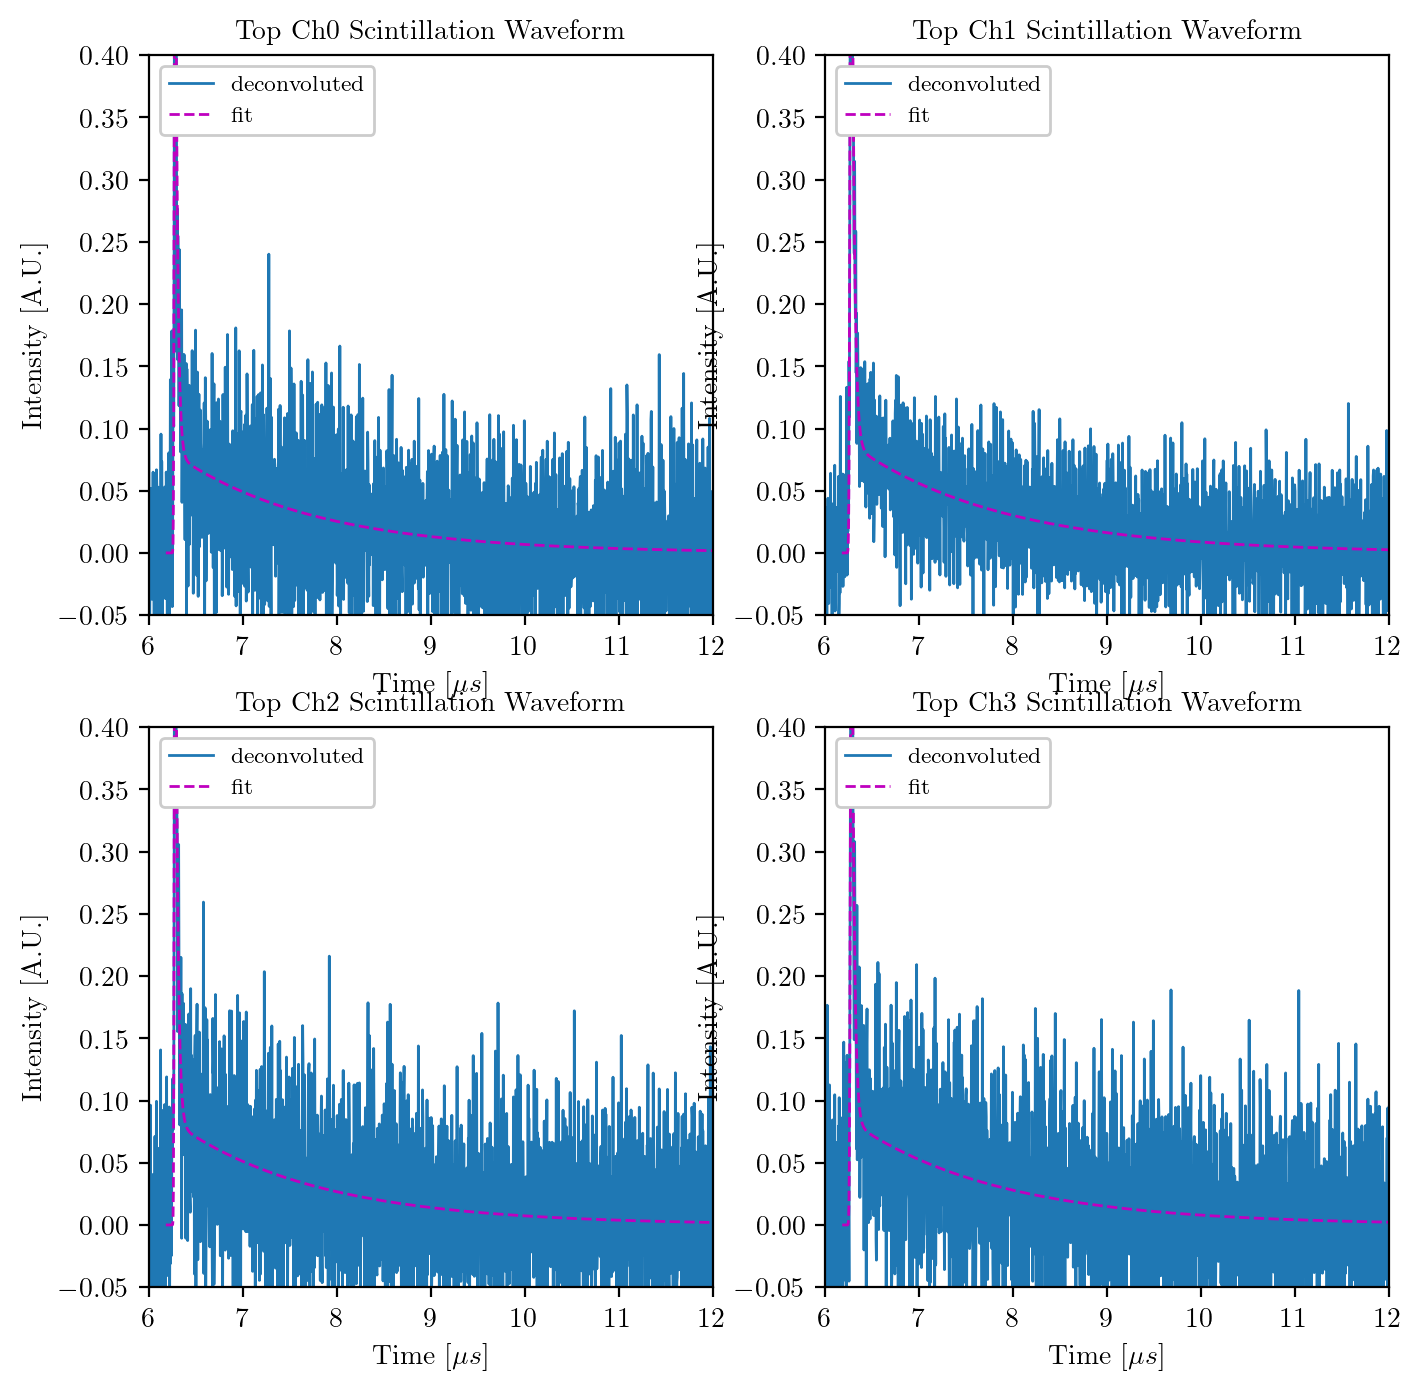

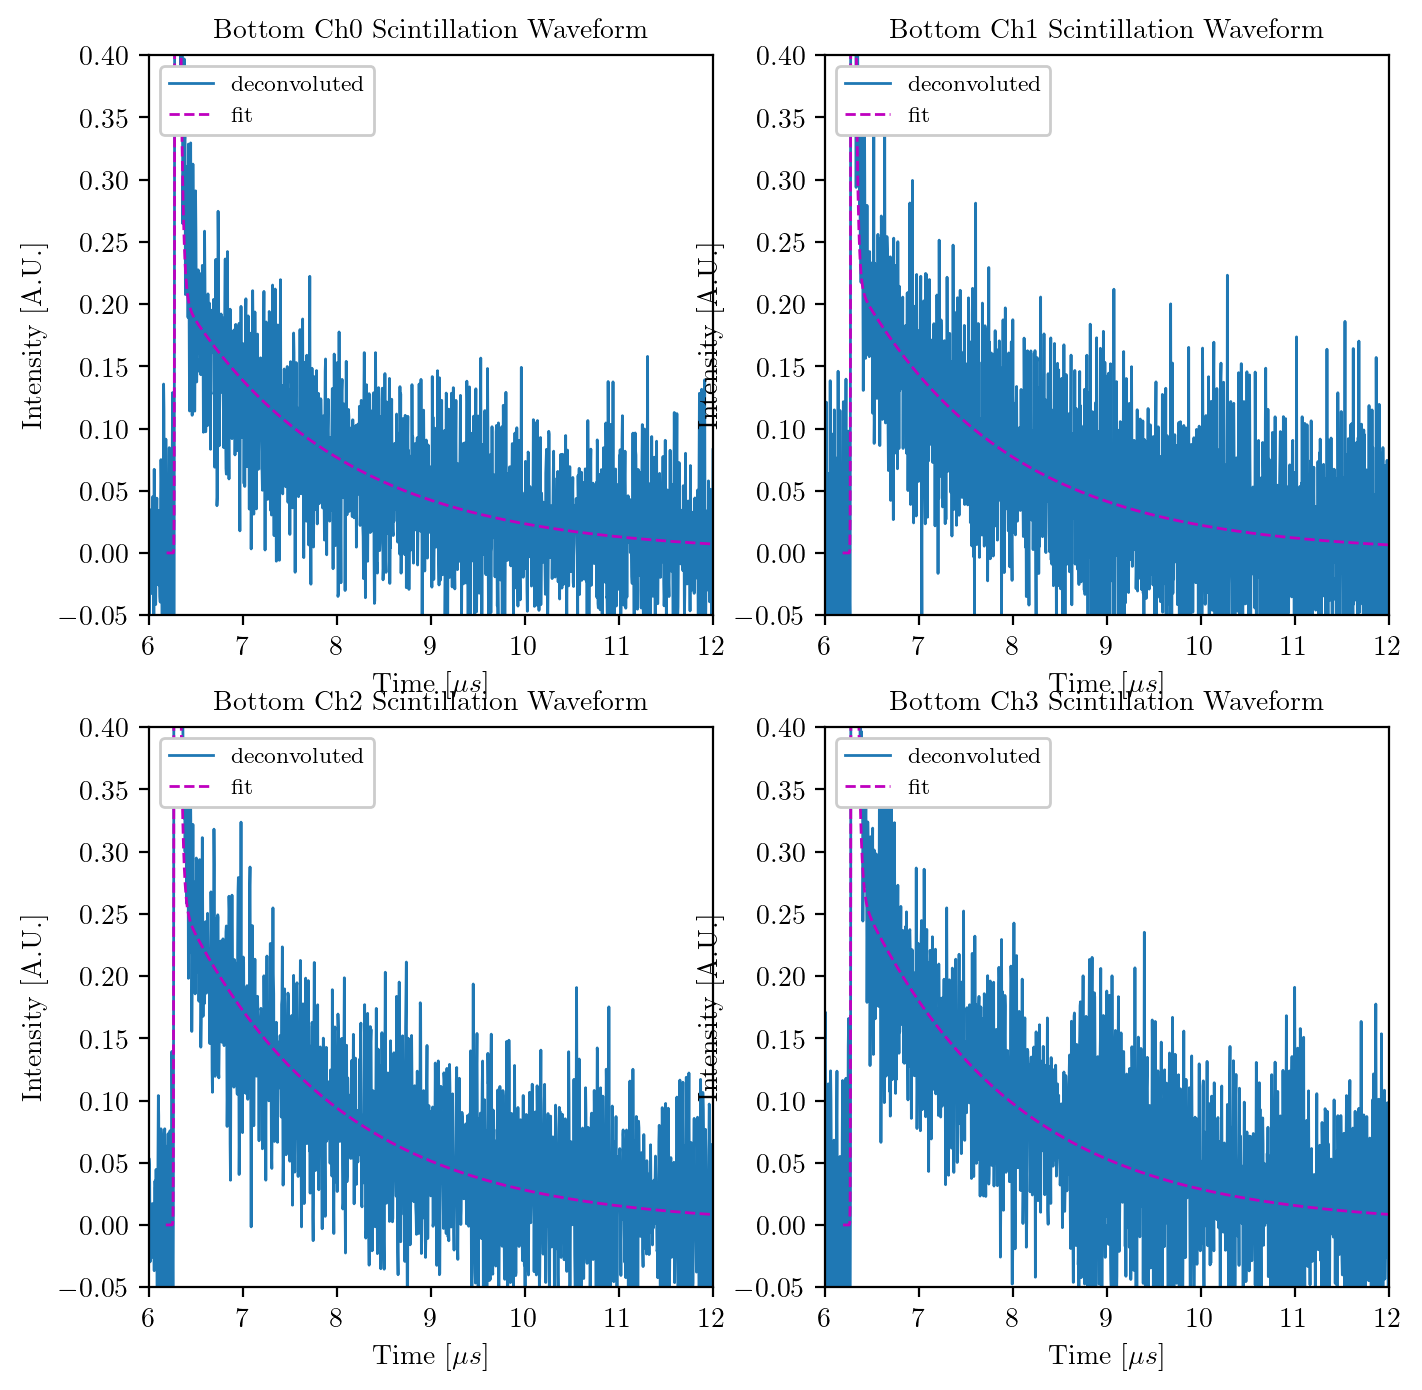

In [60]:
from scipy.fft import fft, ifft
import ROOT
f_deconv_sum = []
position = ['Top', 'Bottom']
for i in range(2):
    dset = ds1115[i*3]
    plt.figure(i,figsize=(8,8))
    f_deconv_sum_pos = np.zeros(dset.ch[0].samples)
    file = None
    if i==0:
        file = ROOT.TFile('SPE_waveform_top.root', 'read')
    else:
        file = ROOT.TFile('SPE_waveform_bottom.root', 'read')
    for ch in range(4):
#         if i==0:
#             dset.ch[ch].set_pulse_pars(*pulse_pars_top[ch])
#         else:
#             dset.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
        
        ftilde = fft(dset.ch[ch].avgwf)
#         plt.plot(abs(ftilde))
#         a1,tau1,a2,tau2 = dset.ch[ch].get_pulse_pars()
#         h = lambda x: a1*np.exp(-x/tau1)+a2*np.exp(-x/tau2)
#         htilde_ = fft(h(dset.ch[ch].time))
#         plt.plot(abs(htilde_.imag))
        gSPE = file.Get('gSPE_ch{}'.format(ch))
        spe_wf = np.array(list(gSPE.GetY()))
        tpeak = np.argmax(spe_wf)
        htilde = fft(spe_wf)
        for f in range(len(htilde)):
            htilde[f] *= np.exp(complex(0,2*np.pi*f*tpeak/spe_wf.size))
#         plt.plot(ifft(htilde))
#         print(spe_wf.size)
#         plt.plot(abs(htilde.imag))
#         plt.plot(abs(ftilde/htilde))
#         plt.yscale('log')
        f_deconv = ifft(ftilde/htilde).real
#         print(np.shape(f_deconv))
#         plt.plot(f_deconv)
        if i!=1 or ch!=1:
            f_deconv_sum_pos += f_deconv
        t0 = np.argmax(f_deconv)-int(0.1/dset.ch[ch].sample_step)
#         print(t0)
        length = int(6/dset.ch[ch].sample_step)
        err = np.std(dset.ch[ch].avgwf[:dset.ch[ch].baseline_samples])
#         print(length)
#         print(np.shape(dset.ch[ch].time[t0:t0+length]))
#         print(np.shape(f_deconv[t0:t0+length]))
        popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], f_deconv[t0:t0+length], p0=[1, 0.02, 0.1, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
        print('ch{} A_S={:.2f}+/-{:.2f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.2f}+/-{:.2f}  TAU_T={:.3f}+/-{:.3f}us sigma={:.4f}+/-{:.4f}us t0={:.3f}+/-{:.3f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
        dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
        dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
        plt.subplot(2,2,ch+1)
        plt.plot(dset.ch[ch].time, f_deconv, label='deconvoluted', linewidth=1)
        plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "m--", label='fit', linewidth=1)
        plt.title('{} Ch{} Scintillation Waveform'.format(position[i],ch))
        plt.ylabel('Intensity [A.U.]')
        plt.xlabel(r'Time [$\mu s$]')
        plt.legend()
        # plt.yscale('log')
        # plt.ylim(1e-3, 1e1)
        plt.ylim(-0.05,0.4)
        plt.xlim(6,12)
    f_deconv_sum.append(f_deconv_sum_pos)

Top A_S=3.5425+/-0.2011  TAU_S=0.0235+/-0.0017us  A_T=0.3328+/-0.0129  TAU_T=1.5644+/-0.0822us sigma=0.0074+/-0.0006us t0=6.2679+/-0.0005us
Bottom A_S=8.4642+/-0.1492  TAU_S=0.0256+/-0.0006us  A_T=0.7531+/-0.0122  TAU_T=1.6644+/-0.0367us sigma=0.0057+/-0.0002us t0=6.2759+/-0.0002us


Text(0.5, 0.98, '1115 Data')

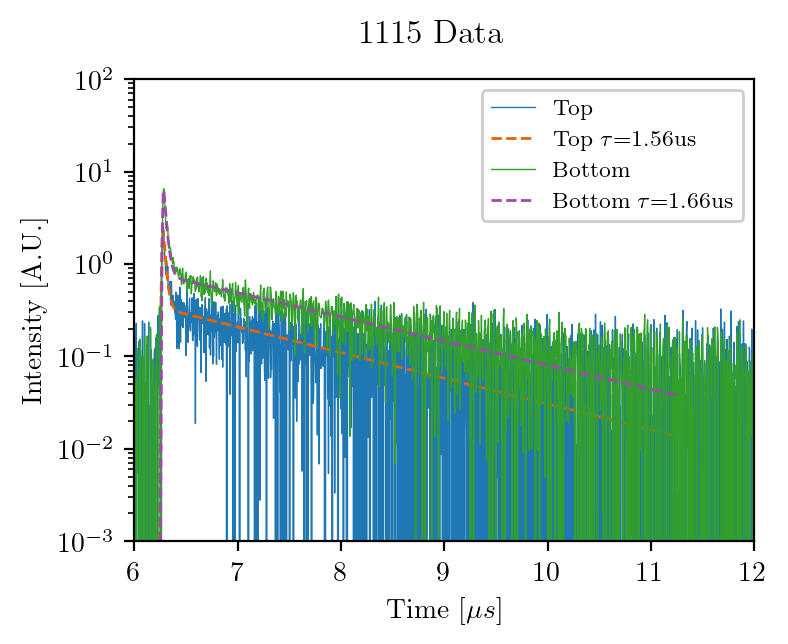

In [62]:
tau_triplet_1115 = []
labels = ['Top','Bottom']
for i,fdc in enumerate(f_deconv_sum):
    dset = ds1115[i*3].ch[0]
    t0 = np.argmax(fdc)+int(-0.05/dset.sample_step)
    length = int(5/dset.sample_step)
    err = np.std(fdc[:dset.baseline_samples])
    popt,pcov = curve_fit(dset.get_scintillation, dset.time[t0:t0+length], fdc[t0:t0+length], p0=[5, 0.02, 0.5, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
    print('{} A_S={:.4f}+/-{:.4f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.4f}+/-{:.4f}  TAU_T={:.4f}+/-{:.4f}us sigma={:.4f}+/-{:.4f}us t0={:.4f}+/-{:.4f}us'.format(labels[i],popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
    tau_triplet_1115.append([popt[3], np.sqrt(pcov[3,3])])
    plt.plot(dset.time, fdc, '-', label=labels[i], linewidth=0.5)
    plt.plot(dset.time[t0:t0+length], dset.get_scintillation(dset.time[t0:t0+length], *popt), '--', label=r'{} $\tau$={:.2f}us'.format(labels[i], popt[3]), linewidth=1)
    
plt.legend(loc='upper right')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Intensity [A.U.]')
plt.yscale('log')
plt.xlim(6, 12)
plt.ylim(1e-3, 1e2)
plt.suptitle('1115 Data')

871620 events simulated


Text(0.5, 0.98, 'Top Chamber 11/15')

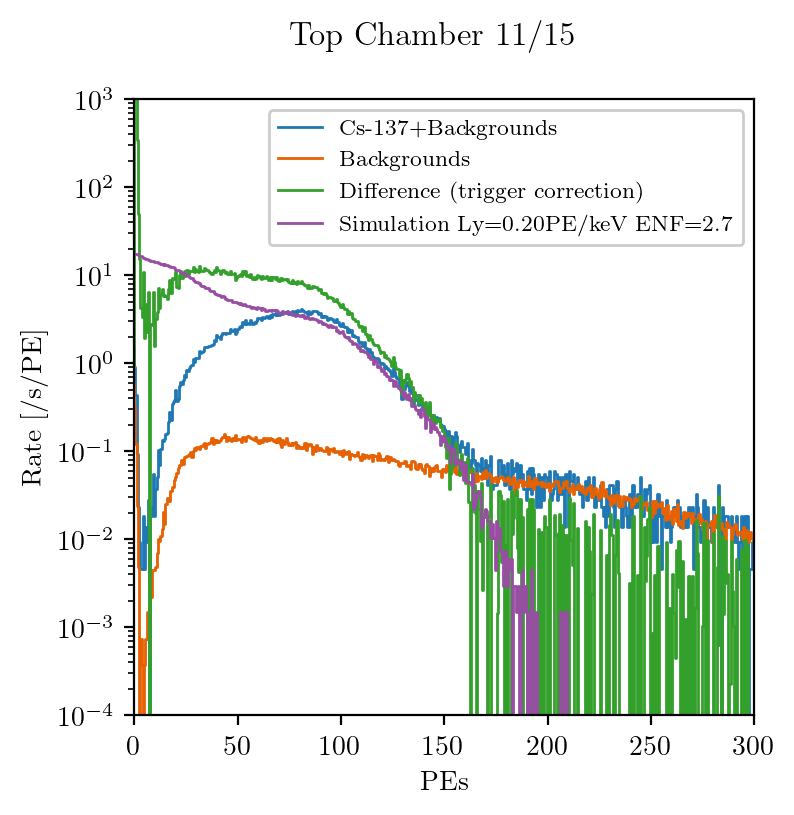

In [9]:
# For the top
import ROOT
from numpy.random import normal

xmin = 0
xmax = 300
nbins = 500
bin_width = (xmax-xmin)/nbins

hist = []
hist_bins = []
labels = ['Cs-137+Backgrounds', 'Backgrounds']
plt.figure(0,figsize=(4,4))
for j in [0,1]:
    dset = ds1115[j]
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
    h = h/dset.ch[0].cumulative_time/bin_width
    hist.append(h)
    hist_bins.append(hx)

hist[1] *= np.sum(hist[0][int((200-xmin)/bin_width):])/np.sum(hist[1][int((200-xmin)/bin_width):])
hdiff = hist[0]-hist[1]
for i,bincont in enumerate(hdiff):
    if i>0:
        hdiff[i] *= (86.182**2.206 + hist_bins[0][i]**2.206)/hist_bins[0][i]**2.206
plt.step(hist_bins[0][:-1], hist[0], label=labels[0], linewidth=1)
plt.step(hist_bins[1][:-1], hist[1], label=labels[1], linewidth=1)
plt.step(hist_bins[0][:-1], hdiff, label='Difference (trigger correction)', linewidth=1)

ly = 0.20
enf = 2.7
file = ROOT.TFile("~/sipm-analysis/jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")
simulated_pe = []
nev = 0
for i,ev in enumerate(tr):
    for j in range(5):
        simulated_pe.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
        nev += 1
print('{} events simulated'.format(nev))
hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
hSimPE = hSimPE*np.sum(hdiff[int((150-xmin)/bin_width):int((200-xmin)/bin_width)])/np.sum(hSimPE[int((150-xmin)/bin_width):int((200-xmin)/bin_width)])
plt.step(hSimPE_bins[:-1], hSimPE, label='Simulation Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)

plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e-4, 1e3)
plt.xlabel('PEs')
plt.ylabel('Rate [/s/PE]')
plt.suptitle('Top Chamber 11/15')

871620 events simulated
a=54.362+/-3.257, b=3.478+/-0.597


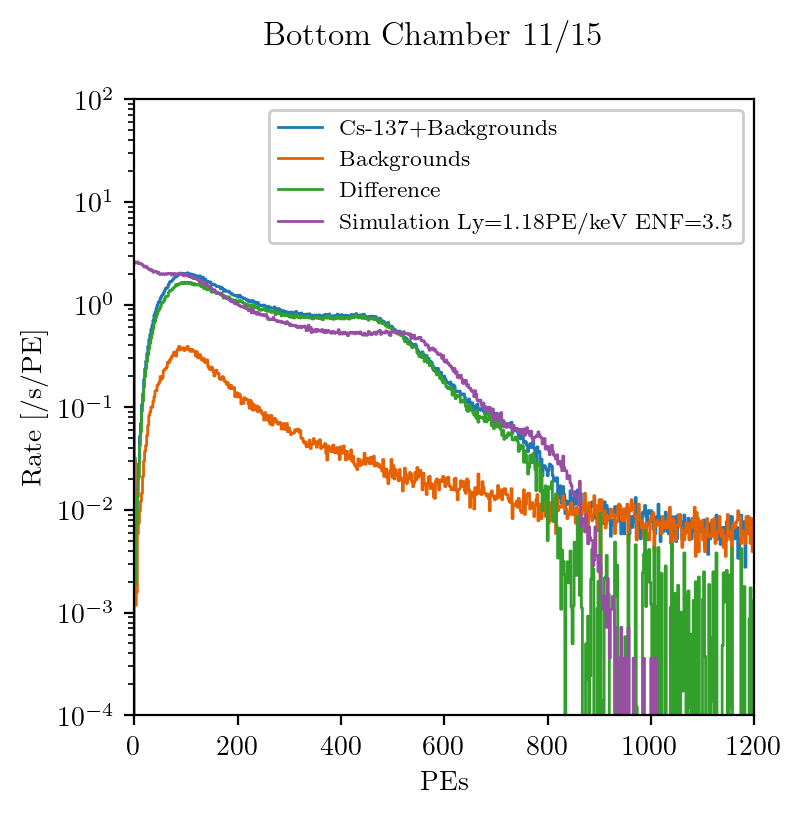

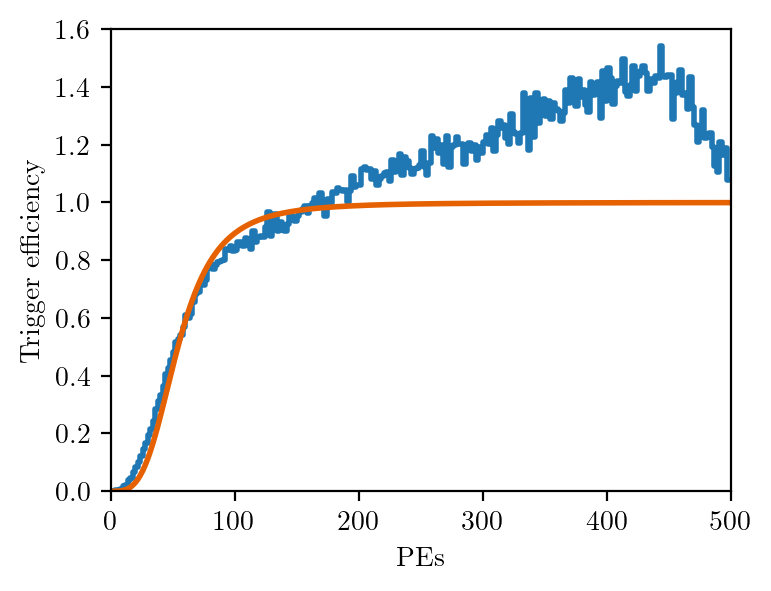

In [8]:
# For the bottom
import ROOT
from numpy.random import normal
xmin = 0
xmax = 1200
nbins = 600
bin_width = (xmax-xmin)/nbins

hist = []
hist_bins = []
labels = ['Cs-137+Backgrounds', 'Backgrounds']
plt.figure(0,figsize=(4,4))
for j in [2,3]:
    dset = ds1115[j]
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
    h = h/dset.ch[0].cumulative_time/bin_width
    hist.append(h)
    hist_bins.append(hx)
    
hist[1] *= np.sum(hist[0][int((1000-xmin)/bin_width):])/np.sum(hist[1][int((1000-xmin)/bin_width):])
hdiff = hist[0]-hist[1]
plt.step(hist_bins[0][:-1], hist[0], label=labels[0], linewidth=1)
plt.step(hist_bins[1][:-1], hist[1], label=labels[1], linewidth=1)
plt.step(hist_bins[0][:-1], hdiff, label='Difference', linewidth=1)

ly = 1.18
enf = 3.5
file = ROOT.TFile("~/sipm-analysis/jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")
simulated_pe = []
nev = 0
for i,ev in enumerate(tr):
    for j in range(5):
        simulated_pe.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
        nev += 1
print('{} events simulated'.format(nev))
hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
hSimPE = hSimPE*np.sum(hdiff[int((400-xmin)/bin_width):int((1000-xmin)/bin_width)])/np.sum(hSimPE[int((400-xmin)/bin_width):int((1000-xmin)/bin_width)])
plt.step(hSimPE_bins[:-1], hSimPE, label='Simulation Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)

plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e-4, 1e2)
plt.xlabel('PEs')
plt.ylabel('Rate [/s/PE]')
plt.suptitle('Bottom Chamber 11/15')

trig_eff = hdiff[1:int((500-xmin)/bin_width)]/hSimPE[1:int((500-xmin)/bin_width)]
plt.figure(2)
plt.step(hSimPE_bins[1:int((500-xmin)/bin_width)], trig_eff)
plt.xlabel('PEs')
plt.ylabel('Trigger efficiency')
from scipy.special import erf

def f_trig(x, a, b):
    return x**b/(x**b+a**b)

popt, pcov = curve_fit(f_trig, hSimPE_bins[1:int((500-xmin)/bin_width)], trig_eff, p0=[100, 2], maxfev=100000)
plt.plot(hSimPE_bins[1:int((500-xmin)/bin_width)], f_trig(hSimPE_bins[1:int((500-xmin)/bin_width)], *popt))
print('a={:.3f}+/-{:.3f}, b={:.3f}+/-{:.3f}'.format(popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1])))

# Bottom 11/07 11/09 11/10 Day

In [3]:
# subdir: 0-9
dir1107bot = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_purification_1/'
#subdir: 0-19
dir1109bot = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_high_stat/'
#subdir: 0-19
dir1110bot = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/'

In [4]:
ds_bot = []
nsubdir = [10,20,20]
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
# gain = [[526.15408, 519.05546, 507.44070, 521.98428], [518.84503, 510.84132, 504.40531, 457.59589]]
#dir1107bot, dir1109bot
for i,dir in enumerate([dir1110bot]):
    for j in range(20):
        subdir = '{}{}/'.format(dir, j)
        print(subdir)
        data = ds.Dataset(subdir, pol=-1, channels=range(4), spe=[1,1,1,1])
        for ch in range(4):
            data.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
            data.ch[ch].path = subdir
            data.ch[ch].read_data()
            data.ch[ch].baseline_subtraction()
            data.ch[ch].deconvolution()
            data.ch[ch].get_integral(prompt=0.1, long=5, deconv=True)
            data.ch[ch].get_avgwf(integral_range=[5*data.gain[ch], 100*data.gain[ch]])
            data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    ds_bot.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/1/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/2/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/3/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/4/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/5/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_co

<Figure size 800x600 with 0 Axes>

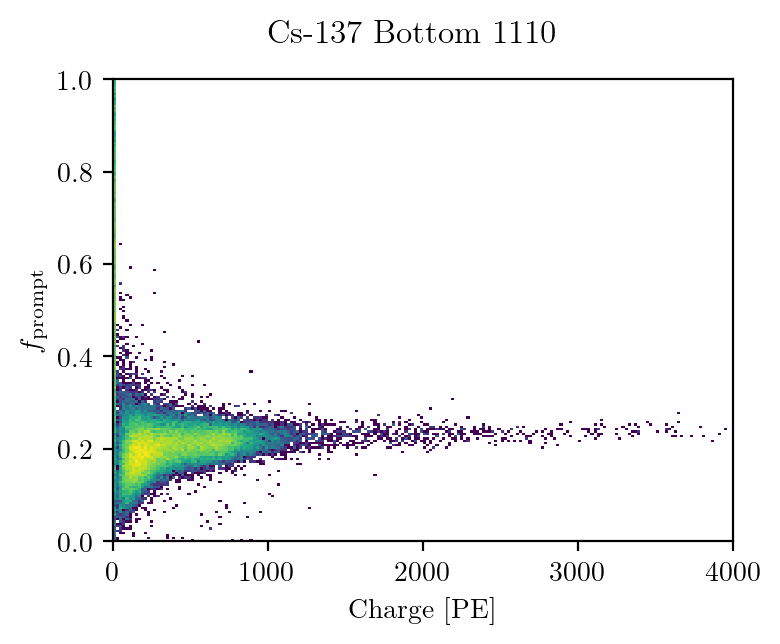

<Figure size 800x600 with 0 Axes>

In [5]:
import matplotlib.colors as colors
plt.figure(0)
dset = ds_bot[0]
plt.hist2d(dset.summed_integral_pe, dset.fprompt, bins=[200,200], range=[[0,4000],[0,1]], norm = colors.LogNorm())
plt.xlabel('Charge [PE]')
plt.ylabel(r'$f_{\rm prompt}$')
plt.suptitle('Cs-137 Bottom 1110')
plt.figure(1)

## Deconvolution channel by channel

In [12]:
from scipy.fft import fft, ifft
f_deconv_sum_bot = []
date = ['1107','1109','1110']
for i,dset in enumerate(ds_bot):
    plt.figure(i,figsize=(8,8))
    f_deconv_sum_day = np.zeros(dset.ch[0].samples)
    for ch in range(4):
        dset.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
        ftilde = fft(dset.ch[ch].avgwf)
        a1,tau1,a2,tau2 = dset.ch[ch].get_pulse_pars()
        h = lambda x: a1*np.exp(-x/tau1)+a2*np.exp(-x/tau2)
        htilde = fft(h(dset.ch[ch].time))
        f_deconv = ifft(ftilde/htilde).real
        f_deconv_sum_day += f_deconv
        t0 = np.argmax(f_deconv)-int(0.1/dset.ch[ch].sample_step)
        length = int(6/dset.ch[ch].sample_step)
        err = np.std(dset.ch[ch].avgwf[:dset.ch[ch].baseline_samples])
        popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], f_deconv[t0:t0+length], p0=[1, 0.02, 0.1, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
        print('ch{} A_S={:.2f}+/-{:.2f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.2f}+/-{:.2f}  TAU_T={:.3f}+/-{:.3f}us sigma={:.4f}+/-{:.4f}us t0={:.3f}+/-{:.3f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
        dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
        dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
        plt.subplot(2,2,ch+1)
        plt.plot(dset.ch[ch].time, f_deconv, label='deconvoluted', linewidth=1)
        plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "m--", label='fit', linewidth=1)
        plt.title('{} Ch{} Scintillation Waveform'.format(date[i],ch))
        plt.ylabel('Intensity [A.U.]')
        plt.xlabel(r'Time [$\mu s$]')
        plt.legend()
        # plt.yscale('log')
        # plt.ylim(1e-3, 1e1)
        plt.ylim(-0.05,0.2)
        plt.xlim(6,12)
    f_deconv_sum_bot.append(f_deconv_sum_day)

NameError: name 'ds_bot' is not defined

## Summed scintillation pulse

11/07 A_S=2.5734+/-871771.1647  TAU_S=0.1049+/-0.0023us  A_T=0.4504+/-15734.7836  TAU_T=1.0499+/-0.0143us sigma=0.0211+/-6418.1163us t0=6.1933+/-36805.0249us
11/09 A_S=1.4085+/-953930.3853  TAU_S=0.0871+/-0.0022us  A_T=0.4407+/-16852.9493  TAU_T=1.5385+/-0.0131us sigma=0.0084+/-4572.3519us t0=6.2344+/-58826.7034us
11/10 A_S=1.3776+/-440772.9532  TAU_S=0.0843+/-0.0023us  A_T=0.4156+/-6692.9893  TAU_T=1.7009+/-0.0141us sigma=0.0137+/-3781.2547us t0=6.2296+/-27412.8496us


/home/as111/sipm-analysis/sipm/sipm.py:26: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/sipm.py:340: RuntimeWarning: invalid value encountered in add
  return pulse_jitter(t, a_s, tau_s, sigma, t0) + pulse_jitter(t, a_t, tau_t, sigma, t0)


Text(0.5, 0.98, 'Bottom Chamber')

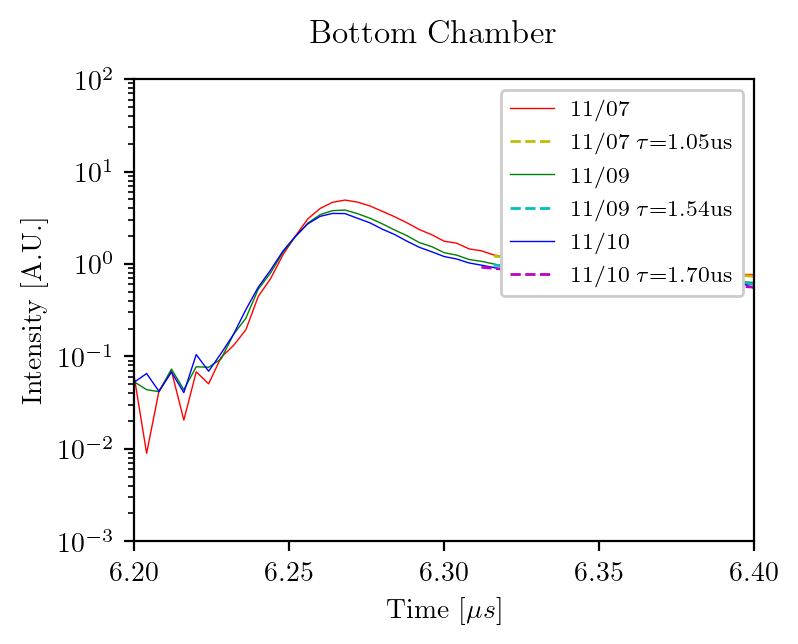

In [25]:
colors = ['r', 'g', 'b']
colors_fit = ['y','c','m']
labels = ['11/07', '11/09', '11/10']
tau_triplet_bot = []
for i,fdc in enumerate(f_deconv_sum_bot):
    dset = ds_bot[i].ch[0]
    t0 = np.argmax(fdc)+int(0.05/dset.sample_step)
    length = int(5/dset.sample_step)
    err = np.std(fdc[:dset.baseline_samples])
    popt,pcov = curve_fit(dset.get_scintillation, dset.time[t0:t0+length], fdc[t0:t0+length], p0=[5, 0.02, 0.5, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
    print('{} A_S={:.4f}+/-{:.4f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.4f}+/-{:.4f}  TAU_T={:.4f}+/-{:.4f}us sigma={:.4f}+/-{:.4f}us t0={:.4f}+/-{:.4f}us'.format(labels[i],popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
    tau_triplet_bot.append([popt[3], np.sqrt(pcov[3,3])])
    plt.plot(dset.time, fdc, '{}-'.format(colors[i]), label=labels[i], linewidth=0.5)
    plt.plot(dset.time[t0:t0+length], dset.get_scintillation(dset.time[t0:t0+length], *popt), '{}--'.format(colors_fit[i]), label=r'{} $\tau$={:.2f}us'.format(labels[i], popt[3]), linewidth=1)
    
plt.legend(loc='upper right')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Intensity [A.U.]')
plt.yscale('log')
plt.xlim(6.2, 6.4)
plt.ylim(1e-3, 1e2)
plt.suptitle('Bottom Chamber')

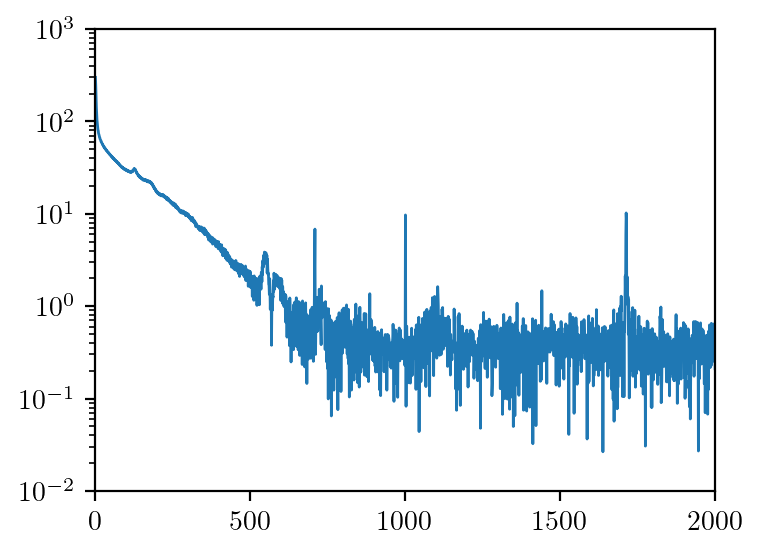

In [77]:
fft_pulse = abs(fft(f_deconv_sum_bot[2])[:2000])
plt.plot(fft_pulse, linewidth=1)
plt.yscale('log')
# for i in range(500, 2000):
#     if fft_pulse[i]>3:
#         print(i, fft_pulse[i])


## Triplet lifetime evolution

(0.8, 2.0)

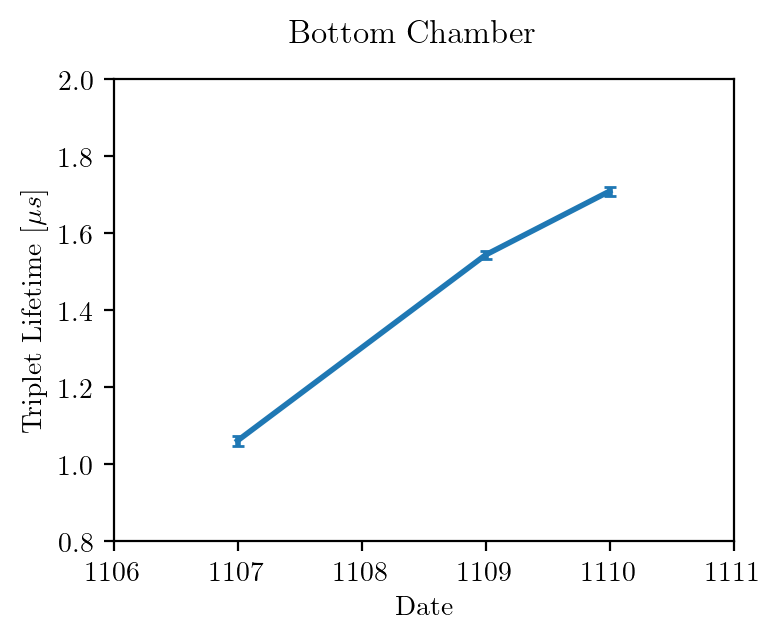

In [62]:
date_bot = [1107, 1109, 1110]
tau_triplet_bot = np.array(tau_triplet_bot)
plt.errorbar(date_bot, tau_triplet_bot[:,0], yerr=tau_triplet_bot[:,1])
plt.xlim(1106, 1111)
plt.xlabel('Date')
plt.ylabel(r'Triplet Lifetime [$\mu s$]')
plt.suptitle('Bottom Chamber')
plt.ylim(0.8, 2.0)

# Bottom 11/10-11/13

In [3]:
# subdir: 0-19
dir1110bot_on = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/'

In [4]:
ds1110bot_on = []
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[526.15408, 519.05546, 507.44070, 521.98428], [518.84503, 510.84132, 504.40531, 457.59589]]
for j in range(20):
    subdir = '{}{}/'.format(dir1110bot_on, j)
    print(subdir)
    data = ds.Dataset('', pol=-1, channels=range(4), spe=gain[1])
    for ch in range(4):
        data.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
        data.ch[ch].path = subdir
        data.ch[ch].read_data()
        data.ch[ch].baseline_subtraction()
        data.ch[ch].get_integral(prompt=0.5, long=5)
        data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    data.get_avgwf_all(count=-1, integral_range=(100,800), fprompt_range=(0.2,0.35))
    ds1110bot_on.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/1/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/2/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/3/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/4/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_overnight/5/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_li

In [18]:
from scipy.fft import fft, ifft
f_deconv_sum = []
# plt.figure(0,figsize=(8,8))
temp = pulse_pars_bot[2]
pulse_pars_bot[2] = pulse_pars_bot[3]
pulse_pars_bot[3] = temp
for i,dset in enumerate(ds1110bot_on):
    f_deconv_sum_i = np.zeros(dset.ch[0].samples)
    for ch in [0,2,3]:
        print(i,ch)
        dset.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
        ftilde = fft(dset.ch[ch].avgwf)
        a1,tau1,a2,tau2 = dset.ch[ch].get_pulse_pars()
        h = lambda x: a1*np.exp(-x/tau1)+a2*np.exp(-x/tau2)
        htilde = fft(h(dset.ch[ch].time))
        f_deconv = ifft(ftilde/htilde).real
        f_deconv_sum_i += f_deconv
        t0 = np.argmax(f_deconv)-int(0.1/dset.ch[ch].sample_step)
        length = int(6/dset.ch[ch].sample_step)
        err = np.std(dset.ch[ch].avgwf[:dset.ch[ch].baseline_samples])
        popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], f_deconv[t0:t0+length], p0=[1, 0.02, 0.1, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
        print('ch{} A_S={:.2f}+/-{:.2f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.2f}+/-{:.2f}  TAU_T={:.3f}+/-{:.3f}us sigma={:.4f}+/-{:.4f}us t0={:.3f}+/-{:.3f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
        dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
        dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
        # plt.subplot(2,2,ch+1)
        # plt.plot(dset.ch[ch].time, f_deconv, label='deconvoluted', linewidth=1)
        # plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "m--", label='fit', linewidth=1)
        # plt.title('{} Ch{} Scintillation Waveform'.format(date[i],ch))
        # plt.ylabel('Intensity [A.U.]')
        # plt.xlabel(r'Time [$\mu s$]')
        # plt.legend()
        # # plt.yscale('log')
        # plt.ylim(1e-3, 1e1)
        # plt.ylim(-0.05,0.2)
        # plt.xlim(6,12)
    f_deconv_sum.append(f_deconv_sum_i)

0 0
ch0 A_S=2.10+/-0.02  TAU_S=0.0316+/-0.0004us  A_T=0.23+/-0.00  TAU_T=1.318+/-0.014us sigma=0.0080+/-0.0001us t0=6.259+/-0.000us
0 2
ch2 A_S=3.46+/-0.04  TAU_S=0.0213+/-0.0003us  A_T=0.45+/-0.00  TAU_T=1.281+/-0.008us sigma=0.0086+/-0.0001us t0=6.259+/-0.000us
0 3
ch3 A_S=2.86+/-0.03  TAU_S=0.0340+/-0.0005us  A_T=0.26+/-0.00  TAU_T=1.477+/-0.021us sigma=0.0079+/-0.0001us t0=6.258+/-0.000us
1 0
ch0 A_S=2.12+/-0.02  TAU_S=0.0312+/-0.0004us  A_T=0.23+/-0.00  TAU_T=1.329+/-0.013us sigma=0.0080+/-0.0001us t0=6.259+/-0.000us
1 2
ch2 A_S=3.48+/-0.04  TAU_S=0.0214+/-0.0003us  A_T=0.45+/-0.00  TAU_T=1.298+/-0.008us sigma=0.0087+/-0.0001us t0=6.259+/-0.000us
1 3
ch3 A_S=2.89+/-0.03  TAU_S=0.0338+/-0.0005us  A_T=0.26+/-0.00  TAU_T=1.498+/-0.021us sigma=0.0080+/-0.0001us t0=6.258+/-0.000us
2 0
ch0 A_S=2.13+/-0.02  TAU_S=0.0314+/-0.0004us  A_T=0.23+/-0.00  TAU_T=1.348+/-0.013us sigma=0.0080+/-0.0001us t0=6.259+/-0.000us
2 2
ch2 A_S=3.52+/-0.04  TAU_S=0.0216+/-0.0003us  A_T=0.46+/-0.00  TAU_T=1.3

0 A_S=0.4868+/-0.1509  TAU_S=0.0743+/-0.0118us  A_T=0.7321+/-0.0067  TAU_T=1.5301+/-0.0071us sigma=0.0519+/-0.0118us t0=6.4168+/-0.0119us
1 A_S=0.5256+/-0.1636  TAU_S=0.0698+/-0.0115us  A_T=0.7336+/-0.0059  TAU_T=1.5471+/-0.0071us sigma=0.0518+/-0.0110us t0=6.4200+/-0.0103us
2 A_S=0.5371+/-0.1668  TAU_S=0.0691+/-0.0115us  A_T=0.7477+/-0.0057  TAU_T=1.5644+/-0.0070us sigma=0.0524+/-0.0107us t0=6.4201+/-0.0098us
3 A_S=0.5243+/-0.1706  TAU_S=0.0701+/-0.0121us  A_T=0.7537+/-0.0062  TAU_T=1.5631+/-0.0072us sigma=0.0523+/-0.0114us t0=6.4192+/-0.0107us
4 A_S=0.5272+/-0.2219  TAU_S=0.0703+/-0.0153us  A_T=0.7535+/-0.0082  TAU_T=1.5781+/-0.0092us sigma=0.0523+/-0.0151us t0=6.4176+/-0.0146us
5 A_S=0.5259+/-0.1693  TAU_S=0.0715+/-0.0120us  A_T=0.7615+/-0.0063  TAU_T=1.5917+/-0.0070us sigma=0.0534+/-0.0117us t0=6.4168+/-0.0111us
6 A_S=0.5382+/-0.1429  TAU_S=0.0643+/-0.0093us  A_T=0.7441+/-0.0043  TAU_T=1.6009+/-0.0061us sigma=0.0485+/-0.0084us t0=6.4259+/-0.0073us
7 A_S=0.5539+/-0.1720  TAU_S=0.064

Text(0.5, 0.98, 'Bottom Chamber')

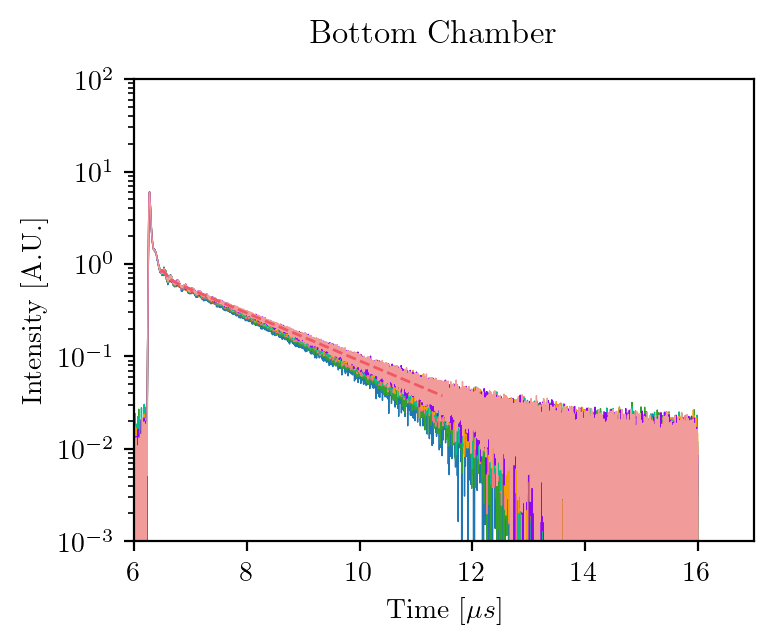

In [19]:
tau_triplet_1110on = []
for i,fdc in enumerate(f_deconv_sum):
    dset = ds1110bot_on[i].ch[0]
    t0 = np.argmax(fdc)+int(0.2/dset.sample_step)
    length = int(5/dset.sample_step)
    err = np.std(fdc[:dset.baseline_samples])
    popt,pcov = curve_fit(dset.get_scintillation, dset.time[t0:t0+length], fdc[t0:t0+length], p0=[5, 0.02, 0.5, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
    print('{} A_S={:.4f}+/-{:.4f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.4f}+/-{:.4f}  TAU_T={:.4f}+/-{:.4f}us sigma={:.4f}+/-{:.4f}us t0={:.4f}+/-{:.4f}us'.format(i,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
    tau_triplet_1110on.append([popt[3], np.sqrt(pcov[3,3])])
    if i%3==0:
        plt.plot(dset.time, fdc, '-', label='{}'.format(i), linewidth=0.5)
        plt.plot(dset.time[t0:t0+length], dset.get_scintillation(dset.time[t0:t0+length], *popt), '--', label=r'{} $\tau$={:.2f}us'.format(i, popt[3]), linewidth=1)
    
# plt.legend(loc='upper right')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Intensity [A.U.]')
plt.yscale('log')
plt.xlim(6, 17)
plt.ylim(1e-3, 1e2)
plt.suptitle('Bottom Chamber')

(1.4, 2.0)

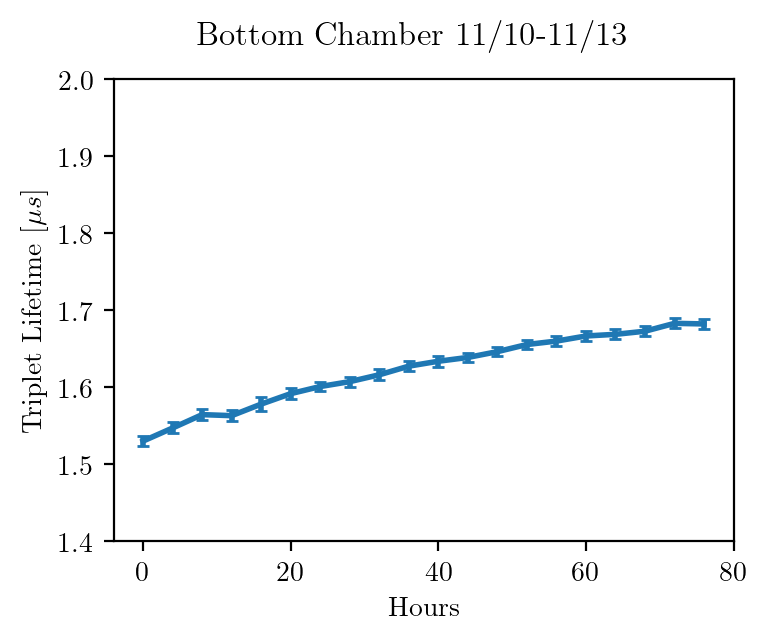

In [20]:
tau_triplet_1110on = np.array(tau_triplet_1110on)
plt.errorbar(np.arange(0,80,4), tau_triplet_1110on[:,0], yerr=tau_triplet_1110on[:,1])
plt.xlim(-4, 80)
plt.xlabel('Hours')
plt.ylabel(r'Triplet Lifetime [$\mu s$]')
plt.suptitle('Bottom Chamber 11/10-11/13')
plt.ylim(1.4, 2.0)

Text(0.5, 0.98, 'Bottom Chamber 11/10-11/13')

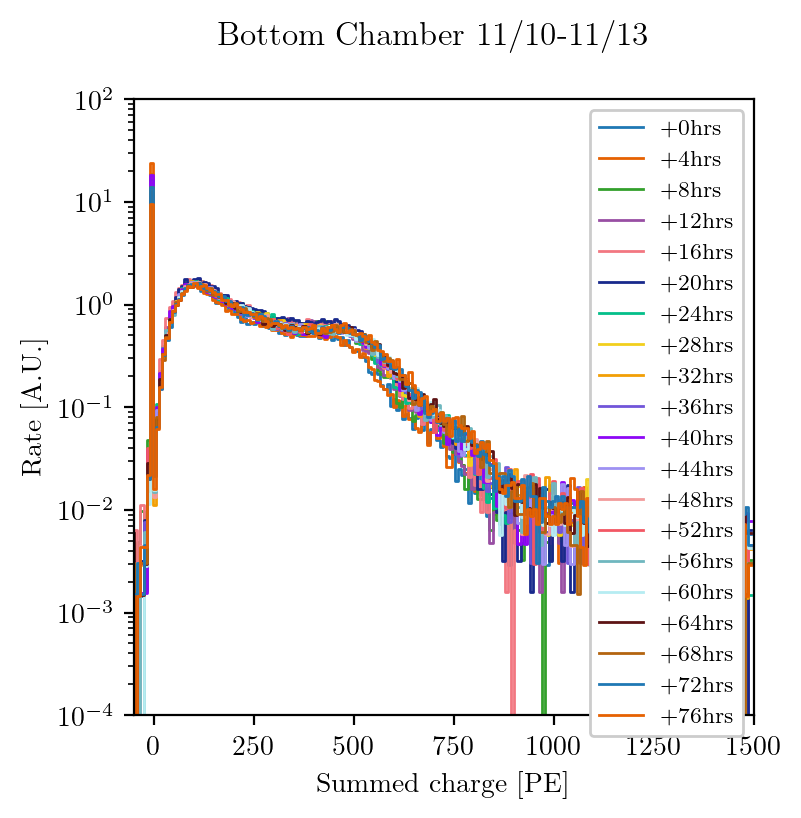

In [9]:
xmin = -50
xmax = 1500
nbins = 200
bin_width = (xmax-xmin)/nbins

hist = []
plt.figure(0,figsize=(4,4))
for j,dset in enumerate(ds1110bot_on):
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
    # h = h/np.max(h[20:])
    h = h/dset.ch[0].cumulative_time/bin_width
    hist.append(h)
    if j>=0:
        plt.step(hx[:-1], h, label='+{}hrs'.format(j*4), linewidth=1)
# plt.step(hx[:-1], hist[1]-hist[0], label='difference', linewidth=1)
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e-4, 1e2)
plt.xlabel('Summed charge [PE]')
plt.ylabel('Rate [A.U.]')
plt.suptitle('Bottom Chamber 11/10-11/13')

Text(0.5, 0.98, 'Bottom 1110 (4)')

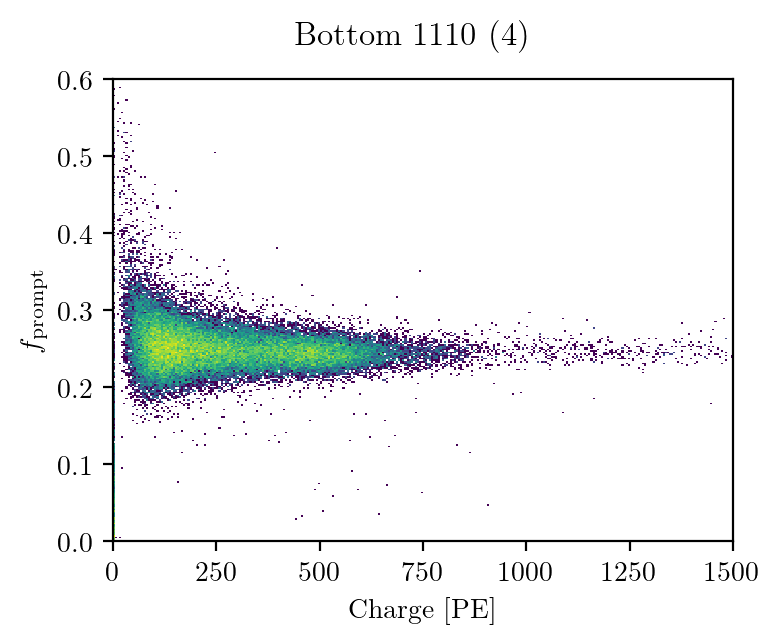

In [11]:
import matplotlib.colors as colors
plt.figure(0)
dset = ds1110bot_on[-1]
plt.hist2d(dset.summed_integral_pe, dset.fprompt, bins=[300,300], range=[[0,1500],[0,0.6]], norm = colors.LogNorm())
plt.xlabel('Charge [PE]')
plt.ylabel(r'$f_{\rm prompt}$')
plt.suptitle('Bottom 1110 (4)')

# Top 11/08 11/09 11/10 Day

In [32]:
# subdir: 0
dir1108top = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-08/2022-11-08_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_0/'
#subdir: 0-19
dir1109top = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/'
#subdir: 0-19
dir1110top = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/'

In [33]:
ds_top = []
nsubdir = [1,20,20]
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[526.15408, 519.05546, 507.44070, 521.98428], [518.84503, 510.84132, 504.40531, 457.59589]]
for i,dir in enumerate([dir1108top, dir1109top, dir1110top]):
    for j in range(nsubdir[i]):
        subdir = '{}{}/'.format(dir, j)
        print(subdir)
        data = ds.Dataset(subdir, pol=-1, channels=range(4), spe=gain[0])
        for ch in range(4):
            data.ch[ch].path = subdir
            data.ch[ch].read_data()
            data.ch[ch].baseline_subtraction()
            data.ch[ch].get_integral(prompt=0.5, long=5)
            data.ch[ch].get_avgwf(integral_range=[5*data.gain[ch], 100*data.gain[ch]])
            data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    ds_top.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-08/2022-11-08_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_0/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/1/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/2/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/3/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/4/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-09/2022-11-09_volt_65_pos_top_light_scintillation_coinc_111_c

## Deconvolution channel by channel

ch0 A_S=0.67+/-0.02  TAU_S=0.0258+/-0.0009us  A_T=0.08+/-0.00  TAU_T=1.017+/-0.024us sigma=0.0110+/-0.0003us t0=6.248+/-0.000us
ch1 A_S=1.62+/-0.30  TAU_S=0.0095+/-0.0017us  A_T=0.18+/-0.00  TAU_T=0.559+/-0.013us sigma=0.0131+/-0.0006us t0=6.250+/-0.001us
ch2 A_S=0.73+/-0.02  TAU_S=0.0268+/-0.0007us  A_T=0.09+/-0.00  TAU_T=1.134+/-0.019us sigma=0.0105+/-0.0003us t0=6.246+/-0.000us
ch3 A_S=1.12+/-0.06  TAU_S=0.0145+/-0.0008us  A_T=0.04+/-0.00  TAU_T=1.598+/-0.043us sigma=0.0135+/-0.0003us t0=6.252+/-0.000us
ch0 A_S=0.68+/-0.02  TAU_S=0.0252+/-0.0010us  A_T=0.07+/-0.00  TAU_T=1.184+/-0.027us sigma=0.0107+/-0.0003us t0=6.248+/-0.000us
ch1 A_S=1.33+/-0.15  TAU_S=0.0120+/-0.0014us  A_T=0.17+/-0.00  TAU_T=0.668+/-0.014us sigma=0.0123+/-0.0005us t0=6.249+/-0.001us
ch2 A_S=0.74+/-0.02  TAU_S=0.0263+/-0.0007us  A_T=0.09+/-0.00  TAU_T=1.345+/-0.020us sigma=0.0104+/-0.0002us t0=6.247+/-0.000us
ch3 A_S=1.11+/-0.05  TAU_S=0.0144+/-0.0007us  A_T=0.04+/-0.00  TAU_T=1.819+/-0.041us sigma=0.0133+/-0.00

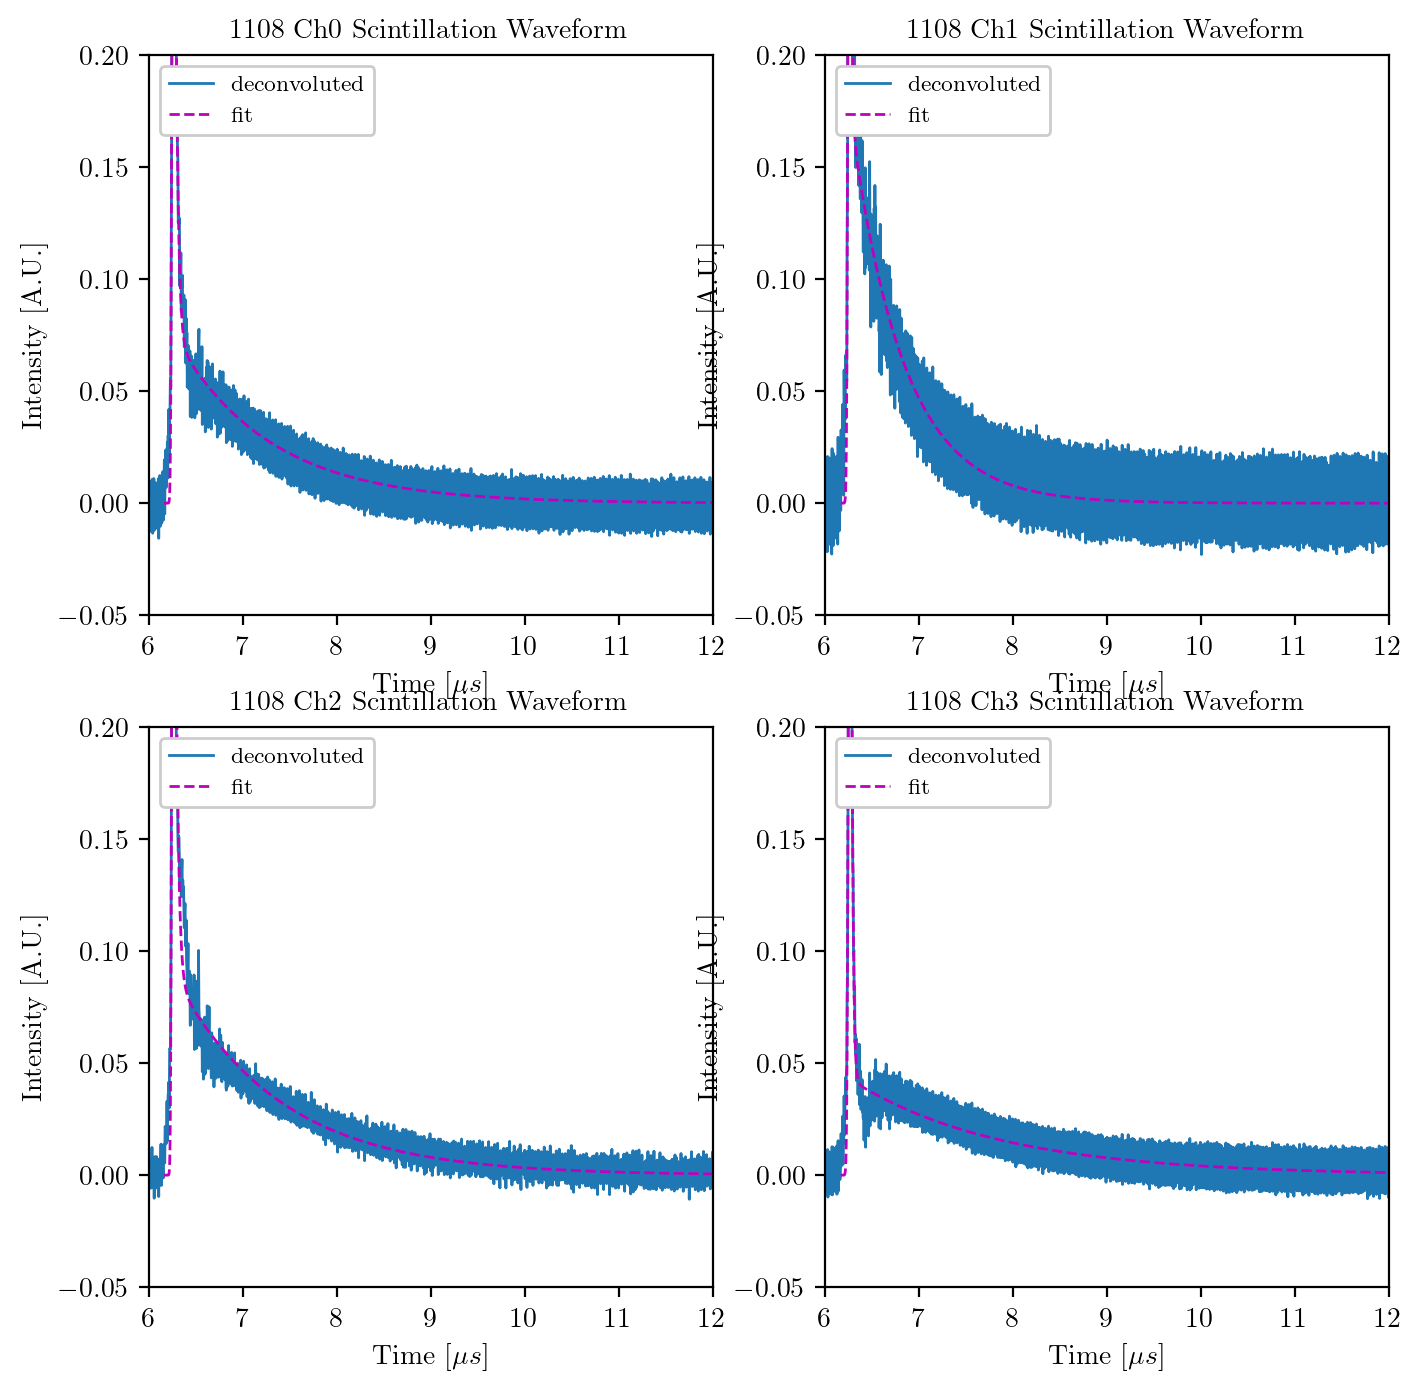

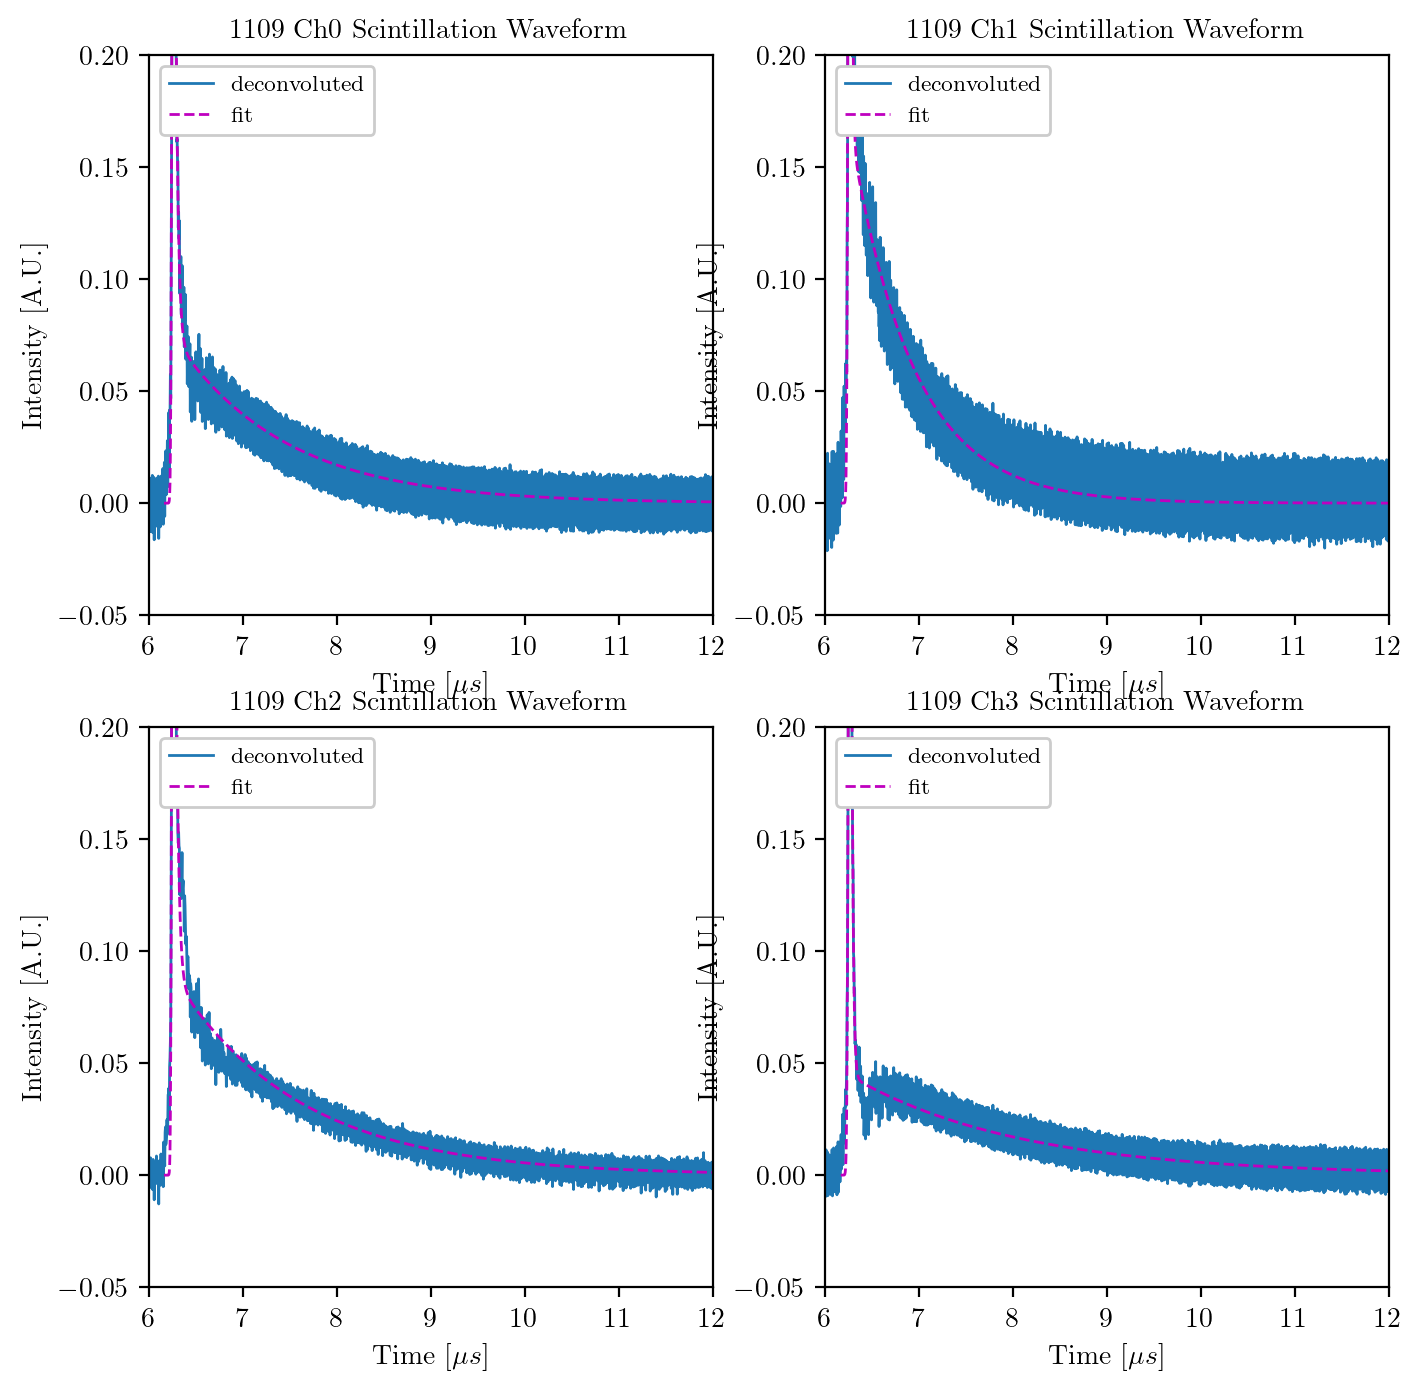

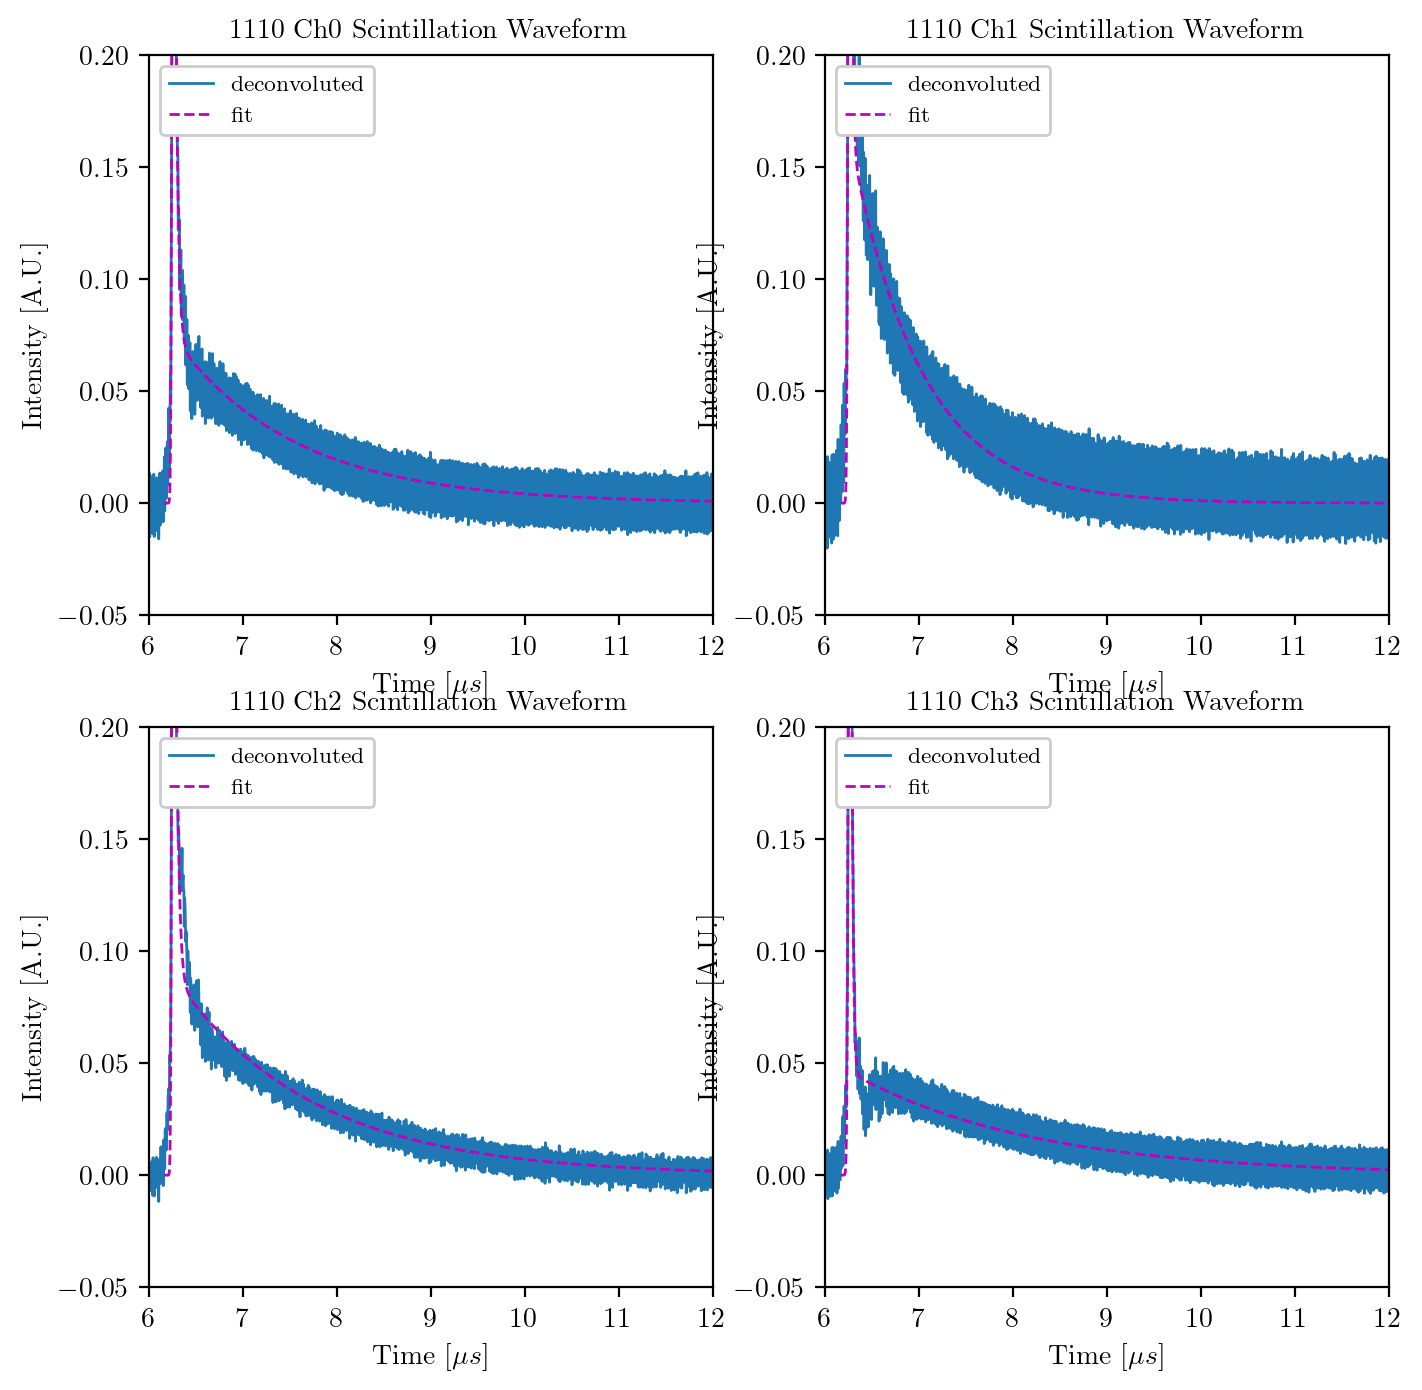

In [34]:
from scipy.fft import fft, ifft
f_deconv_sum_top = []
date = ['1108','1109','1110']
for i,dset in enumerate(ds_top):
    plt.figure(i,figsize=(8,8))
    f_deconv_sum_day = np.zeros(dset.ch[0].samples)
    for ch in range(4):
        dset.ch[ch].set_pulse_pars(*pulse_pars_top[ch])
        ftilde = fft(dset.ch[ch].avgwf)
        a1,tau1,a2,tau2 = dset.ch[ch].get_pulse_pars()
        h = lambda x: a1*np.exp(-x/tau1)+a2*np.exp(-x/tau2)
        htilde = fft(h(dset.ch[ch].time))
        f_deconv = ifft(ftilde/htilde).real
        f_deconv_sum_day += f_deconv
        t0 = np.argmax(f_deconv)-int(0.1/dset.ch[ch].sample_step)
        length = int(6/dset.ch[ch].sample_step)
        err = np.std(dset.ch[ch].avgwf[:dset.ch[ch].baseline_samples])
        popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], f_deconv[t0:t0+length], p0=[1, 0.02, 0.1, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
        print('ch{} A_S={:.2f}+/-{:.2f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.2f}+/-{:.2f}  TAU_T={:.3f}+/-{:.3f}us sigma={:.4f}+/-{:.4f}us t0={:.3f}+/-{:.3f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
        dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
        dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
        plt.subplot(2,2,ch+1)
        plt.plot(dset.ch[ch].time, f_deconv, label='deconvoluted', linewidth=1)
        plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "m--", label='fit', linewidth=1)
        plt.title('{} Ch{} Scintillation Waveform'.format(date[i],ch))
        plt.ylabel('Intensity [A.U.]')
        plt.xlabel(r'Time [$\mu s$]')
        plt.legend()
        # plt.yscale('log')
        # plt.ylim(1e-3, 1e1)
        plt.ylim(-0.05,0.2)
        plt.xlim(6,12)
    f_deconv_sum_top.append(f_deconv_sum_day)

## Summed scintillation pulse

In [57]:
colors = ['r', 'g', 'b']
colors_fit = ['y','c','m']
labels = ['11/08', '11/09', '11/10']
tau_triplet_top = []
for i,fdc in enumerate(f_deconv_sum_top):
    dset = ds_top[i].ch[0]
    t0 = np.argmax(fdc)+int(0.05/dset.sample_step)
    length = int(5/dset.sample_step)
    err = np.std(fdc[:dset.baseline_samples])
    popt,pcov = curve_fit(dset.get_scintillation, dset.time[t0:t0+length], fdc[t0:t0+length], p0=[5, 0.02, 0.5, 1.2, 0.01, 6.25], sigma=[err]*length, maxfev=100000)
    print('{} A_S={:.4f}+/-{:.4f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.4f}+/-{:.4f}  TAU_T={:.4f}+/-{:.4f}us sigma={:.4f}+/-{:.4f}us t0={:.4f}+/-{:.4f}us'.format(labels[i],popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3]),popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5])))
    tau_triplet_top.append([popt[3], np.sqrt(pcov[3,3])])
    plt.plot(dset.time, fdc, '{}-'.format(colors[i]), label=labels[i], linewidth=0.5)
    plt.plot(dset.time[t0:t0+length], dset.get_scintillation(dset.time[t0:t0+length], *popt), '{}--'.format(colors_fit[i]), label=r'{} $\tau$={:.2f}us'.format(labels[i], popt[3]), linewidth=1)
    
plt.legend(loc='upper right')
plt.xlabel(r'Time [$\mu s$]')
plt.ylabel('Intensity [A.U.]')
plt.yscale('log')
plt.xlim(6, 12)
plt.ylim(1e-3, 1e1)
plt.suptitle('Top Chamber')

NameError: name 'f_deconv_sum_top' is not defined

## Triplet lifetime evolution

Text(0.5, 0.98, 'Top Chamber')

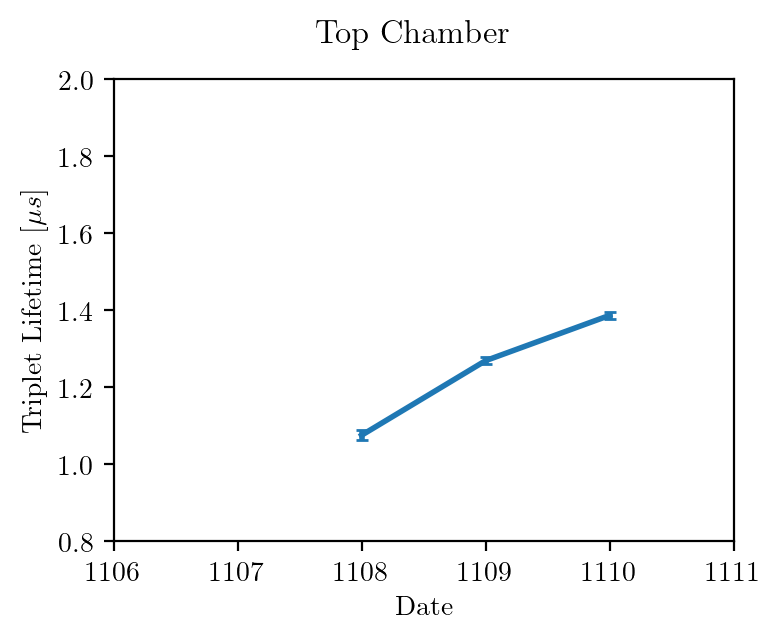

In [36]:
date_top = [1108, 1109, 1110]
tau_triplet_top = np.array(tau_triplet_top)
plt.errorbar(date_top, tau_triplet_top[:,0], yerr=tau_triplet_top[:,1])
plt.xlim(1106, 1111)
plt.xlabel('Date')
plt.ylabel(r'Triplet Lifetime [$\mu s$]')
plt.ylim(0.8, 2.0)
plt.suptitle('Top Chamber')

## Triplet lifetime evolution (Top vs Bottom)

(0.8, 2.0)

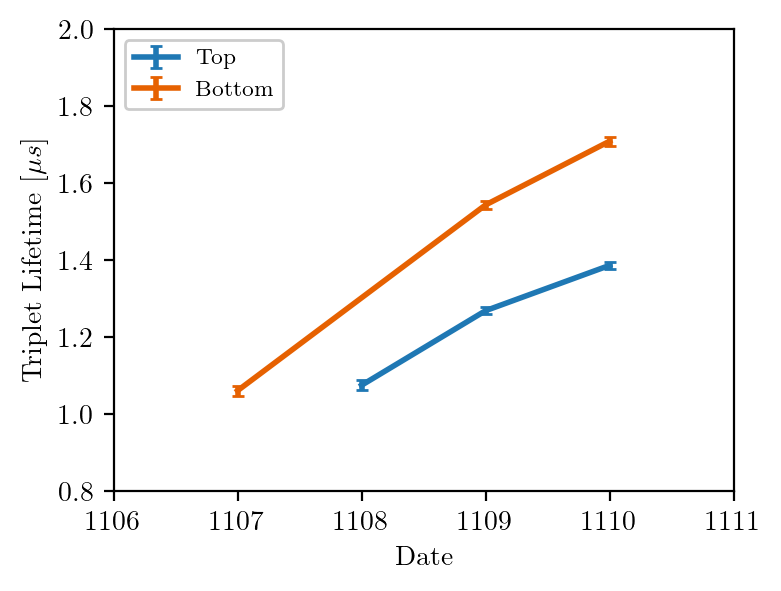

In [37]:
date_top = [1108, 1109, 1110]
tau_triplet_top = np.array(tau_triplet_top)
plt.errorbar(date_top, tau_triplet_top[:,0], yerr=tau_triplet_top[:,1], label='Top')
plt.errorbar(date_bot, tau_triplet_bot[:,0], yerr=tau_triplet_bot[:,1], label='Bottom')
plt.legend()
plt.xlim(1106, 1111)
plt.xlabel('Date')
plt.ylabel(r'Triplet Lifetime [$\mu s$]')
plt.ylim(0.8, 2.0)

# Overnight data top (1107) and bottome (1108)

In [53]:
# subdir: 0-13
dirBotON1107 = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_purification_overnight/'
#subdir: 0-15
dirTopON1108 = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-08/2022-11-08_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_overnight/'

In [54]:
dsBotON1107 = []
dsTopON1108 = []
nsubdir = [12,16]
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[526.15408, 519.05546, 507.44070, 521.98428], [518.84503, 510.84132, 504.40531, 457.59589]]

for i,subdir in enumerate([dirBotON1107, dirTopON1108]):
    for j in range(nsubdir[i]):
        data = ds.Dataset('', pol=-1, channels=range(4), spe=gain[1-i])
        for ch in range(4):
            data.ch[ch].path = '{}{}/'.format(subdir, j)
            print(data.ch[ch].path)
            data.ch[ch].read_data()
            data.ch[ch].baseline_subtraction()
            data.ch[ch].get_integral(prompt=0.5, long=5)
            data.ch[ch].get_avgwf(integral_range=[5*data.gain[ch], 100*data.gain[ch]])
            data.ch[ch].clear()
        data.get_summed_integral_pe()
        data.get_fprompt()
        if i==0:
            dsBotON1107.append(data)
        else:
            dsTopON1108.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_purification_overnight/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_purification_overnight/0/


KeyboardInterrupt: 

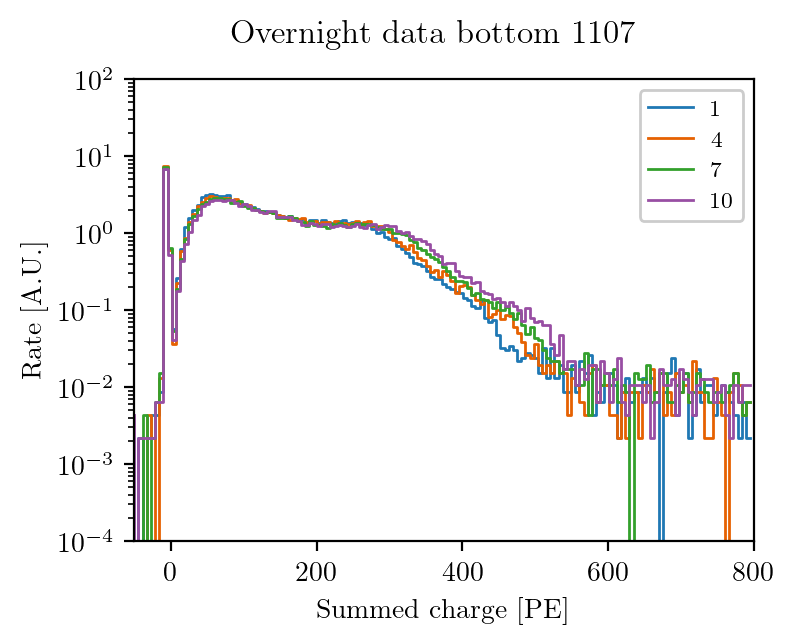

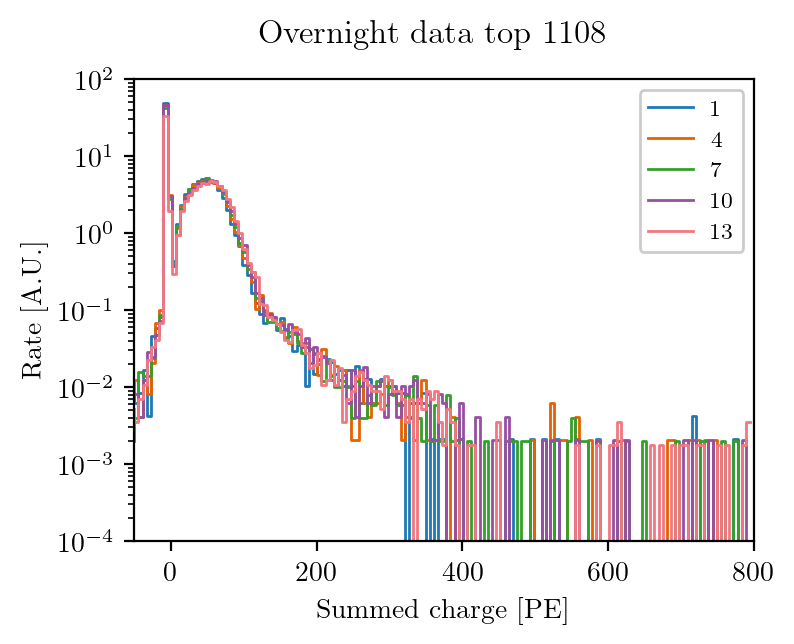

In [ ]:
xmin = -50
xmax = 800
nbins = 150
bin_width = (xmax-xmin)/nbins
titles = ['Overnight data bottom 1107', 'Overnight data top 1108']
for i in range(2):
    dsets = None
    if i==0:
        dsets = dsBotON1107
    else:
        dsets = dsTopON1108
    hist = []
    plt.figure(i)
    for j,dset in enumerate(dsets):
        h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
        # h = h/np.max(h[20:])
        h = h/dset.ch[0].cumulative_time/bin_width
        hist.append(h)
        if j%3==1:
            plt.step(hx[:-1], h, label='{}'.format(j), linewidth=1)
    # plt.step(hx[:-1], hist[1]-hist[0], label='difference', linewidth=1)
    plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlim(xmin, xmax)
    plt.ylim(1e-4, 1e2)
    plt.xlabel('Summed charge [PE]')
    plt.ylabel('Rate [A.U.]')
    plt.suptitle(titles[i])

# High-statistics data 1110

In [3]:
dir1110_top = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/'
dir1110_bot = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_bottom_light_scintillation_coinc_111_cond_gamma_high_stat/'
dir1110_top_bkg = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_no_gamma_high_stat/'

In [4]:
ds1110 = [] #[top, bottom]
gain = [[526.15408, 519.05546, 507.44070, 521.98428], [518.84503, 510.84132, 504.40531, 457.59589]]
for i,dir in enumerate([dir1110_top, dir1110_bot]):
    for j in range(20):
        subdir = '{}{}/'.format(dir, j)
        print(subdir)
        data = ds.Dataset(subdir, pol=-1, channels=range(4), spe=gain[i])
        for ch in range(4):
            if i==0:
                data.ch[ch].set_pulse_pars(*pulse_pars_top[ch])
            else:
                data.ch[ch].set_pulse_pars(*pulse_pars_bot[ch])
            data.ch[ch].path = subdir
            data.ch[ch].read_data()
            data.ch[ch].baseline_subtraction()
            data.ch[ch].get_integral(prompt=0.5, long=5)
            data.ch[ch].get_avgwf(integral_range=[5*data.gain[ch], 100*data.gain[ch]])
            data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    ds1110.append(data)

data = ds.Dataset(dir1110_top_bkg, pol=-1, channels=range(4), spe=gain[0])
for ch in range(4):
    data.ch[ch].set_pulse_pars(*pulse_pars_top[ch])
    data.ch[ch].read_data()
    data.ch[ch].baseline_subtraction()
    data.ch[ch].get_integral(prompt=0.5, long=5)
    data.ch[ch].get_avgwf(integral_range=[5*data.gain[ch], 100*data.gain[ch]])
    data.ch[ch].clear()
data.get_summed_integral_pe()
data.get_fprompt()
ds1110.append(data) #ds1110=[top,bottom,top_bkg]

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/1/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/2/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/3/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/4/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coinc_111_cond_with_gamma_high_stat/5/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-10/2022-11-10_volt_65_pos_top_light_scintillation_coi

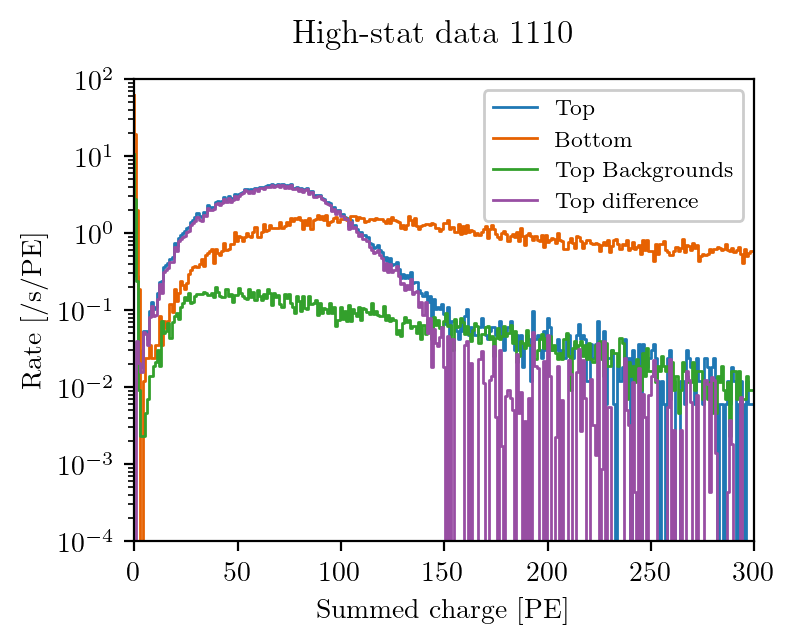

In [46]:
xmin = 0
xmax = 300
nbins = 300
bin_width = (xmax-xmin)/nbins

plt.figure(0)
hist = []
hist_bins = []
#light yield ratio
# lyr = 5.3
# ly = [lyr, 1.0]
labels = ['Top', 'Bottom', 'Top Backgrounds']
for i,dset in enumerate(ds1110):
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
    # h = h/np.max(h[20:])
    h = h/dset.ch[0].cumulative_time/bin_width
    hist.append(h)
    hist_bins.append(hx)
    plt.step(hx[:-1], h, label=labels[i], linewidth=1)
plt.step(hist_bins[2][:-1], hist[0]-hist[2], label='Top difference', linewidth=1)
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e-4, 1e2)
plt.xlabel('Summed charge [PE]')
plt.ylabel('Rate [/s/PE]')
plt.suptitle('High-stat data 1110')
plt.show()


## Compare with G4DS

174324 events simulated


Text(0, 0.5, 'Rate [A.U.]')

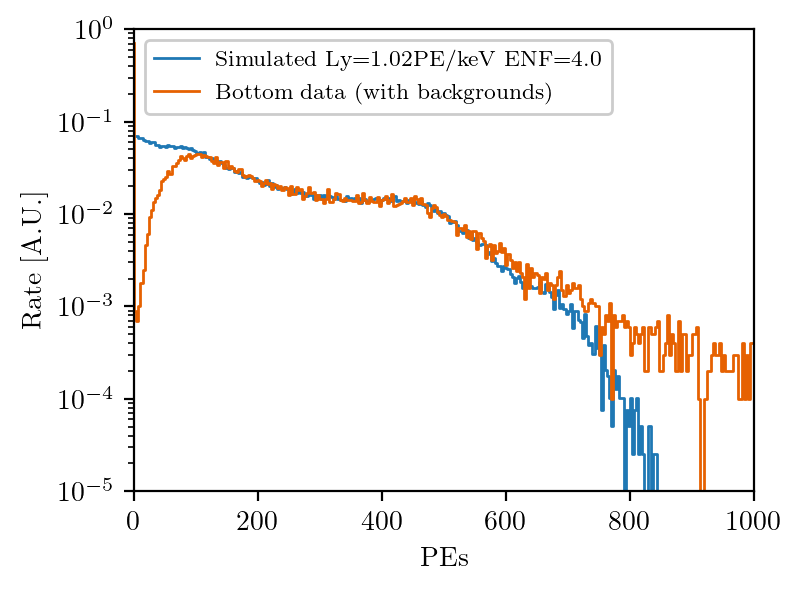

In [45]:
import ROOT
from numpy.random import normal
xmin = 0
xmax = 1000
nbins = 300
bin_width = (xmax-xmin)/nbins
ly = 1.02
enf = 4.
file = ROOT.TFile("jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")
simulated_pe = []
nev = 0
for i,ev in enumerate(tr):
    simulated_pe.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
    nev += 1
    # print('Event {} Edep={:.3f}keV'.format(i, ev.Edep))
print('{} events simulated'.format(nev))
hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
plt.step(hSimPE_bins[:-1], hSimPE/np.sum(hSimPE[int((200-xmin)/bin_width):int((400-xmin)/bin_width)]), label='Simulated Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)
plt.step(hist_bins[1][:-1], hist[1]/np.sum(hist[1][int((200-xmin)/bin_width):int((400-xmin)/bin_width)]), label='Bottom data (with backgrounds)', linewidth=1)
plt.legend()
plt.yscale('log')
plt.xlabel('PEs')
plt.ylabel('Rate [A.U.]')

174324 events simulated


(1e-05, 10.0)

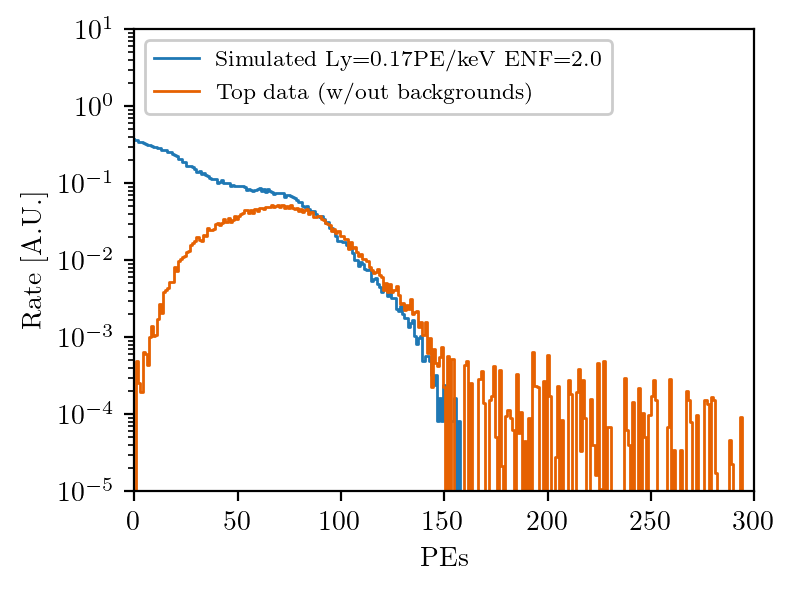

In [48]:
xmin = 0
xmax = 300
nbins = 300
bin_width = (xmax-xmin)/nbins
ly = 0.17
enf = 2.
file = ROOT.TFile("jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")
simulated_pe = []
nev = 0
for i,ev in enumerate(tr):
    simulated_pe.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
    nev += 1
    # print('Event {} Edep={:.3f}keV'.format(i, ev.Edep))
print('{} events simulated'.format(nev))
hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
plt.step(hSimPE_bins[:-1], hSimPE/np.sum(hSimPE[int((80-xmin)/bin_width):int((130-xmin)/bin_width)]), label='Simulated Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)
hTop = hist[0]-hist[2]
plt.step(hist_bins[1][:-1], hTop/np.sum(hTop[int((80-xmin)/bin_width):int((130-xmin)/bin_width)]), label='Top data (w/out backgrounds)', linewidth=1)
plt.legend()
plt.yscale('log')
plt.xlabel('PEs')
plt.ylabel('Rate [A.U.]')
plt.ylim(1e-5, 1e1)

a=0.060+/-0.002 x0=113.285+/-0.630 n=0.193+/-0.231 mu=137.932+/-4.096 sigma=4.704+/-4.643


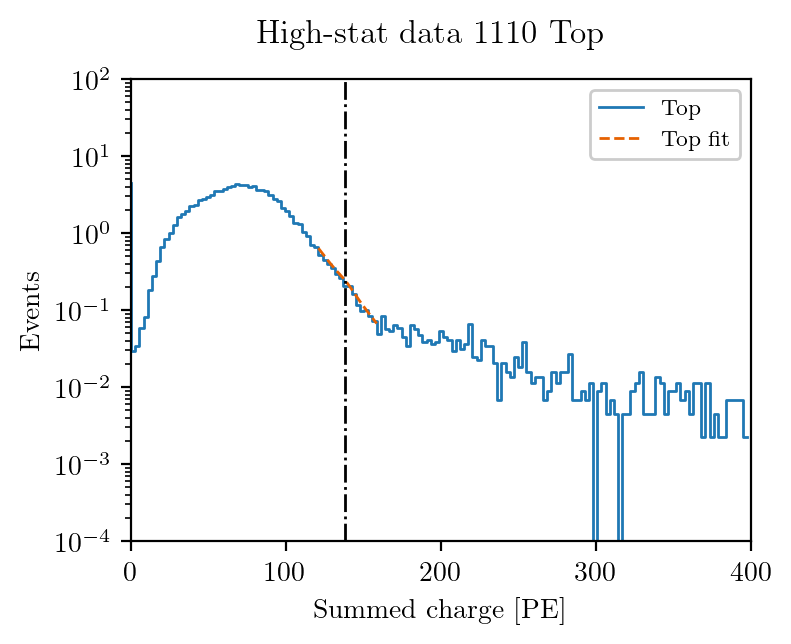

a1=-0.000+/-0.001 a2=0.010+/-0.000 x0=459.943+/-4.707 y0=0.499+/-0.019 n=0.818+/-0.366 mu=704.059+/-7.937 sigma=20.318+/-8.621


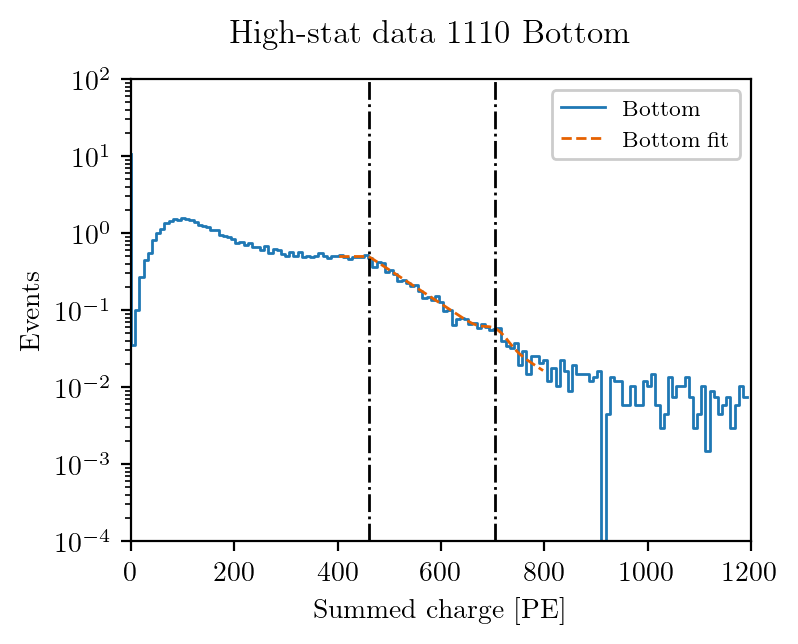

In [56]:
def fit_gamma(x, a1, a2, x0, y0, n, mu, sigma):
    a = 0
    ans = []
    for x_ in x:
        if x_<x0:
            a = a1
        else:
            a = a2
        ans.append(y0*np.exp(-a*(x_-x0)) + n/sigma/np.sqrt(np.pi*2)*np.exp(-((x_-mu)/sigma)**2/2))
    return np.array(ans)

def fit_gamma_photopeak(x, a, x0, n, mu, sigma):
    return np.exp(-a*(x-x0)) + n/sigma/np.sqrt(np.pi*2)*np.exp(-((x-mu)/sigma)**2/2)

xmin = [0, 0]
xmax = [400, 1200]
nbins = [150, 150]
init_pars = [[0.06,113,1,140,5], [0,0.01,450,2e2,1,700,20]]
fit_range_pe = [[120, 160], [400, 800]]
labels = ['Top', 'Bottom']
for i,dset in enumerate(ds1110):
    bin_width = (xmax[i]-xmin[i])/nbins[i]
    plt.figure(i)
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin[i],xmax[i],nbins[i]))
    h = h/dset.ch[0].cumulative_time/bin_width
    plt.step(hx[:-1], h, label=labels[i], linewidth=1)
    # Fitting
    fit_range = [int((fit_range_pe[i][0]-hx[0])/bin_width), int((fit_range_pe[i][1]-hx[0])/bin_width)]
    if i==0:
        popt, pcov = curve_fit(fit_gamma_photopeak, hx[fit_range[0]:fit_range[1]], h[fit_range[0]:fit_range[1]], p0=init_pars[i], sigma=np.sqrt(h[fit_range[0]:fit_range[1]]/dset.ch[0].cumulative_time/bin_width), maxfev=10000)
        plt.plot(hx[fit_range[0]:fit_range[1]], fit_gamma_photopeak(hx[fit_range[0]:fit_range[1]], *popt), '--', label='{} fit'.format(labels[i]), linewidth=1)
        print('a={:.3f}+/-{:.3f} x0={:.3f}+/-{:.3f} n={:.3f}+/-{:.3f} mu={:.3f}+/-{:.3f} sigma={:.3f}+/-{:.3f}'.format(popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1]), popt[2], np.sqrt(pcov[2,2]), popt[3], np.sqrt(pcov[3,3]), popt[4], np.sqrt(pcov[4,4])))
        plt.plot([popt[3], popt[3]], [1e-4, 1e2], 'k-.', linewidth=1)
    else:
        popt, pcov = curve_fit(fit_gamma, hx[fit_range[0]:fit_range[1]], h[fit_range[0]:fit_range[1]], p0=init_pars[i], sigma=np.sqrt(h[fit_range[0]:fit_range[1]]/dset.ch[0].cumulative_time/bin_width), maxfev=10000)
        plt.plot(hx[fit_range[0]:fit_range[1]], fit_gamma(hx[fit_range[0]:fit_range[1]], *popt), '--', label='{} fit'.format(labels[1]), linewidth=1)
        print('a1={:.3f}+/-{:.3f} a2={:.3f}+/-{:.3f} x0={:.3f}+/-{:.3f} y0={:.3f}+/-{:.3f} n={:.3f}+/-{:.3f} mu={:.3f}+/-{:.3f} sigma={:.3f}+/-{:.3f}'.format(popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1]), popt[2], np.sqrt(pcov[2,2]), popt[3], np.sqrt(pcov[3,3]), popt[4], np.sqrt(pcov[4,4]), popt[5], np.sqrt(pcov[5,5]), popt[6], np.sqrt(pcov[6,6])))
        plt.plot([popt[2], popt[2]], [1e-4, 1e2], 'k-.', linewidth=1)
        plt.plot([popt[5], popt[5]], [1e-4, 1e2], 'k-.', linewidth=1)
    plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlim(xmin[i], xmax[i])
    plt.ylim(1e-4, 1e2)
    plt.xlabel('Summed charge [PE]')
    plt.ylabel('Events')
    plt.suptitle('High-stat data 1110 {}'.format(labels[i]))
    plt.show()


In [44]:
selected_wfid = ds1109[0].get_waveforms_id(count=10, integral_range=(-5,0))
selected_wf = []
for ch in range(4):
    print(ds1109[0].ch[ch].trigger_position*ds1109[0].ch[0].sample_step)
    selected_wf.append(ds1109[0].ch[ch].get_waveforms(event_id=selected_wfid))

NameError: name 'ds1109' is not defined

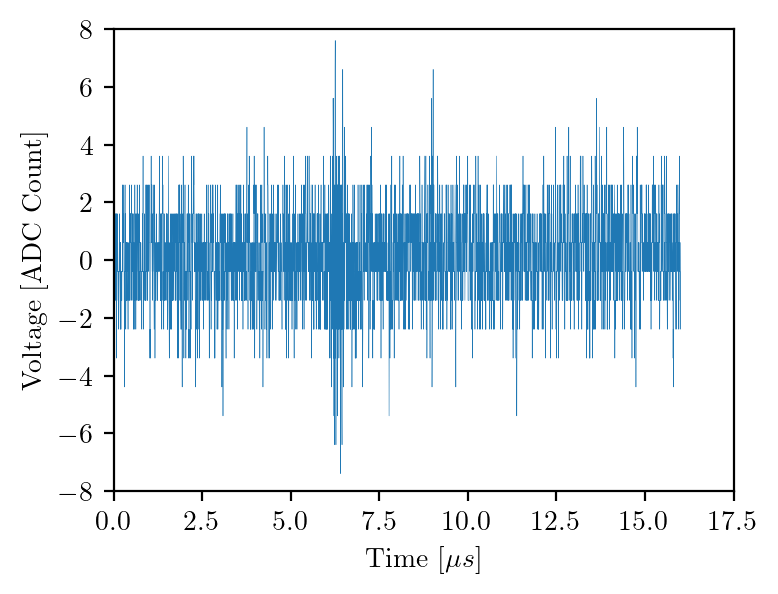

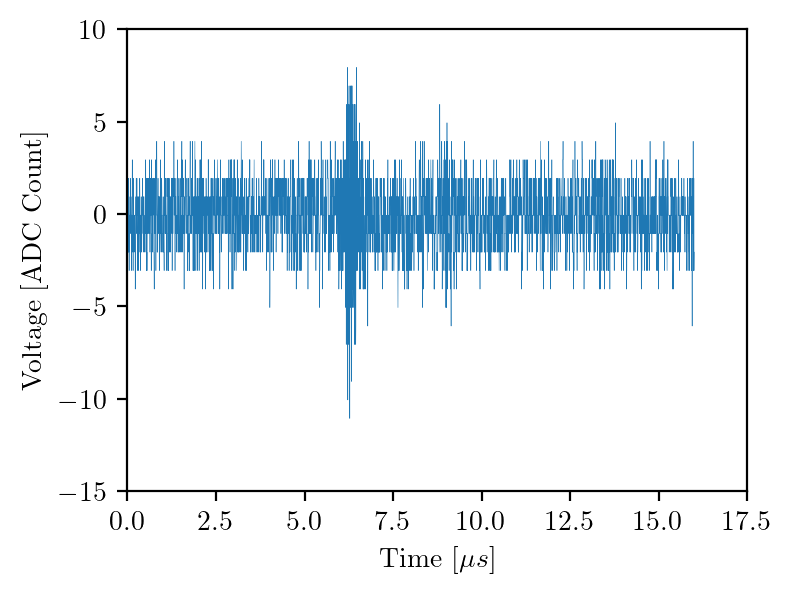

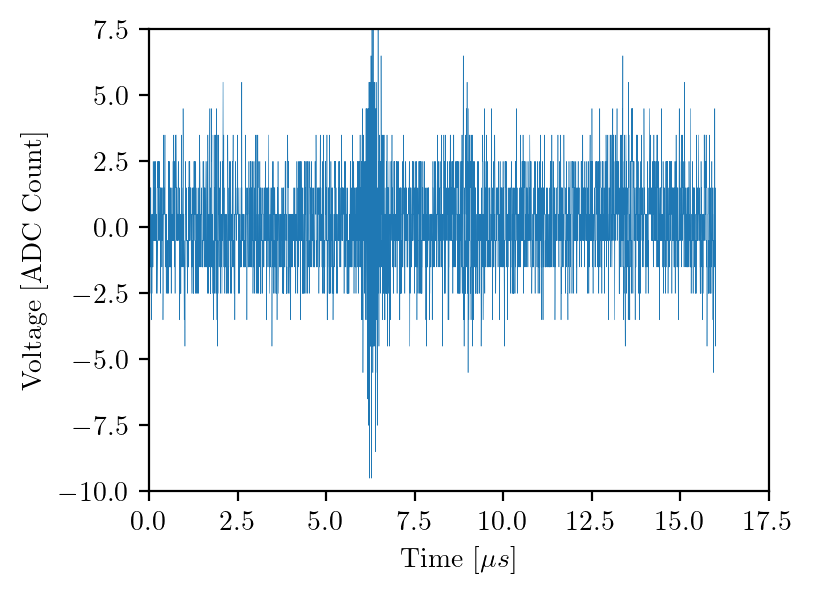

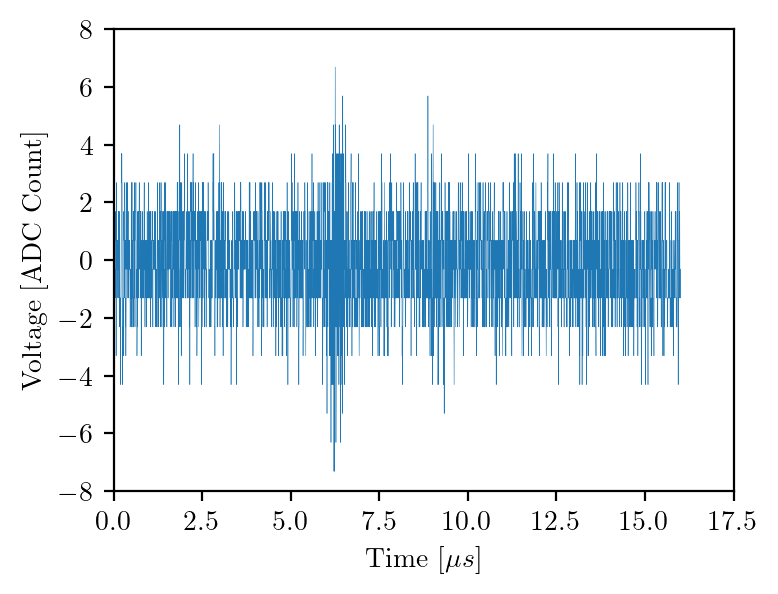

: 

In [ ]:
tmin = 0
tmax = 16.0
tmin_sample = int(tmin/ds1109[0].ch[0].sample_step)
tmax_sample = int(tmax/ds1109[0].ch[0].sample_step)
for ch in range(4):
    plt.figure(ch)
    for iwf in range(1):
        plt.plot(ds1109[0].ch[ch].time[tmin_sample:tmax_sample], selected_wf[ch][iwf][tmin_sample:tmax_sample], linewidth=0.2)
    plt.xlabel(r'Time [$\mu s$]')
    plt.ylabel(r'Voltage [ADC Count]')